In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import joblib

print("="*70)
print("C2C PROJECT - KMEANS CLUSTERING ON PCA DATA")
print("="*70)

# ============================================================
# STEP 1: Load PCA-Reduced Data
# ============================================================
print("\n[Step 1] Loading PCA-reduced data...")
df_pca = pd.read_csv('Data/pca_dataset.csv')
print(f"✓ Loaded PCA data: {df_pca.shape}")
print(f"  Samples: {df_pca.shape[0]}")
print(f"  Features (Principal Components): {df_pca.shape[1]}")
print(df_pca.head())


C2C PROJECT - KMEANS CLUSTERING ON PCA DATA

[Step 1] Loading PCA-reduced data...
✓ Loaded PCA data: (10492, 15)
  Samples: 10492
  Features (Principal Components): 15
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.643886 -1.122140  2.537791  1.099319 -1.369180 -1.000934  0.412556   
1  5.521503  5.381358  0.630654 -0.761986 -1.898238 -0.422578  1.608672   
2  0.125187 -1.359416 -1.530675  0.029985  0.985078  0.797654 -0.014865   
3  0.463894 -1.737125 -0.550389  0.748471  0.452760  0.676662 -0.761163   
4  0.683091 -1.870049  0.741572 -1.016563 -0.789394 -0.912539 -0.378118   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.210129  1.527971  1.999805  0.289292  0.966083  2.029509 -0.421655   
1 -1.188513 -1.060446 -0.196492  0.164946  0.480813  0.937488  0.781078   
2  0.654682 -0.015723  0.554539 -0.342296  1.340841  1.257426  1.938887   
3  0.036764  1.061602 -0.939935 -0.379566 -0.160286  0.293775 -0.321141   
4 -0.5

In [2]:
# ============================================================
# STEP 2: Determine Optimal Number of Clusters
# ============================================================
print("\n[Step 2] Determining optimal number of clusters...")
print("-" * 70)

# Test range of cluster numbers
cluster_range = range(2, 11)

# Initialize metrics dictionary
metrics = {
    'n_clusters': [],
    'inertia': [],
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print("\nTesting different numbers of clusters...\n")

# Evaluate each k
for k in cluster_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(df_pca)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_pca, labels)
    davies_bouldin = davies_bouldin_score(df_pca, labels)
    calinski = calinski_harabasz_score(df_pca, labels)
    
    # Store metrics
    metrics['n_clusters'].append(k)
    metrics['inertia'].append(inertia)
    metrics['silhouette'].append(silhouette)
    metrics['davies_bouldin'].append(davies_bouldin)
    metrics['calinski_harabasz'].append(calinski)
    
    # Print results
    print(f"k={k}:")
    print(f"  Inertia: {inertia:,.2f}")
    print(f"  Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Score: {calinski:,.2f} (higher is better)")
    print()


[Step 2] Determining optimal number of clusters...
----------------------------------------------------------------------

Testing different numbers of clusters...

k=2:
  Inertia: 216,235.55
  Silhouette Score: 0.3198 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.1040 (lower is better)
  Calinski-Harabasz Score: 3,187.81 (higher is better)

k=3:
  Inertia: 173,089.48
  Silhouette Score: 0.3387 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.2648 (lower is better)
  Calinski-Harabasz Score: 3,298.33 (higher is better)

k=4:
  Inertia: 160,302.88
  Silhouette Score: 0.1724 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 1.9760 (lower is better)
  Calinski-Harabasz Score: 2,652.92 (higher is better)

k=5:
  Inertia: 152,393.99
  Silhouette Score: 0.1586 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 2.0338 (lower is better)
  Calinski-Harabasz Score: 2,228.81 (higher is better)

k=6:
  Inertia: 145,521.92
  Silhouette Score: 0.1532 (hig

[Step 3] Visualizing clustering evaluation metrics...
✓ Saved: pca_clustering_evaluation.png


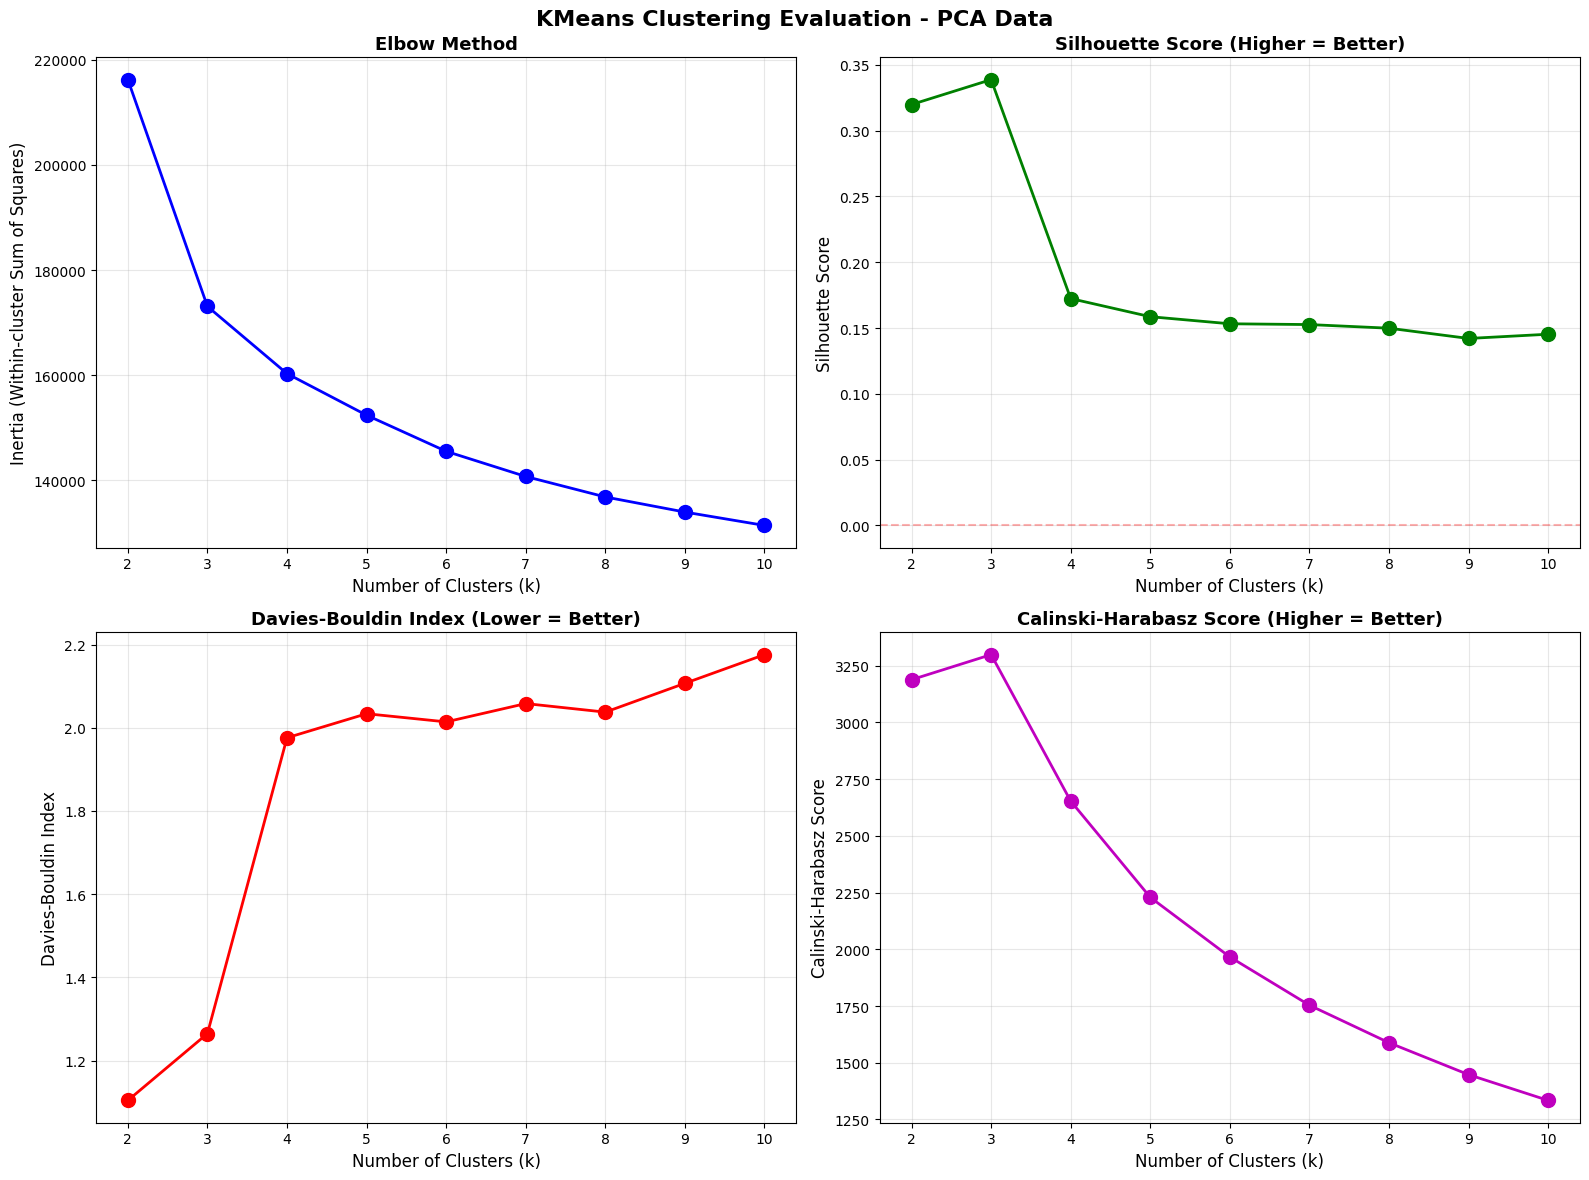

In [3]:


# ============================================================
# STEP 3: Visualize Evaluation Metrics
# ============================================================
print("[Step 3] Visualizing clustering evaluation metrics...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('KMeans Clustering Evaluation - PCA Data', fontsize=16, fontweight='bold')

# 1. Elbow Method (Inertia)
axes[0, 0].plot(metrics['n_clusters'], metrics['inertia'], 'bo-', 
               linewidth=2, markersize=10)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0, 0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics['n_clusters'])

# 2. Silhouette Score
axes[0, 1].plot(metrics['n_clusters'], metrics['silhouette'], 'go-', 
               linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics['n_clusters'])
axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index
axes[1, 0].plot(metrics['n_clusters'], metrics['davies_bouldin'], 'ro-', 
               linewidth=2, markersize=10)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics['n_clusters'])

# 4. Calinski-Harabasz Score
axes[1, 1].plot(metrics['n_clusters'], metrics['calinski_harabasz'], 'mo-', 
               linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics['n_clusters'])

plt.tight_layout()
print("✓ Saved: pca_clustering_evaluation.png")
plt.show()

In [4]:
# ============================================================
# STEP 4: Recommend Optimal k
# ============================================================
print("\n[Step 4] Recommendations for optimal k:")
print("-" * 70)

# Find best k for each metric
best_silhouette_k = metrics['n_clusters'][np.argmax(metrics['silhouette'])]
best_db_k = metrics['n_clusters'][np.argmin(metrics['davies_bouldin'])]
best_ch_k = metrics['n_clusters'][np.argmax(metrics['calinski_harabasz'])]

print(f"Best k by Silhouette Score: {best_silhouette_k}")
print(f"Best k by Davies-Bouldin Index: {best_db_k}")
print(f"Best k by Calinski-Harabasz Score: {best_ch_k}")

# Calculate elbow using rate of change
inertia_diff = np.diff(metrics['inertia'])
inertia_diff_pct = (inertia_diff / metrics['inertia'][:-1]) * 100
elbow_k = metrics['n_clusters'][np.argmin(np.abs(inertia_diff_pct + 10)) + 1]  # Approximate elbow
print(f"Approximate elbow point: {elbow_k}")

print("\n" + "="*70)
print("PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k")
print("="*70)


[Step 4] Recommendations for optimal k:
----------------------------------------------------------------------
Best k by Silhouette Score: 3
Best k by Davies-Bouldin Index: 2
Best k by Calinski-Harabasz Score: 3
Approximate elbow point: 4

PLEASE REVIEW THE PLOTS AND CHOOSE YOUR OPTIMAL k


In [5]:
# ============================================================
# STEP 5: Apply Final Clustering
# ============================================================

# Prompt for optimal k (you can change this based on the plots)
optimal_k = 4

print(f"\n[Step 5] Applying KMeans with k={optimal_k}...")
print("-" * 70)

# Fit final KMeans model
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=50,  # More initializations for stability
    max_iter=300
)

cluster_labels = kmeans_final.fit_predict(df_pca)

# Add cluster labels to dataframe
df_pca['Cluster'] = cluster_labels

print(f"✓ Clustering complete with k={optimal_k}")

# Calculate final metrics
final_silhouette = silhouette_score(df_pca.drop(columns='Cluster'), cluster_labels)
final_db = davies_bouldin_score(df_pca.drop(columns='Cluster'), cluster_labels)
final_ch = calinski_harabasz_score(df_pca.drop(columns='Cluster'), cluster_labels)

print(f"\nFinal Clustering Metrics:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")




[Step 5] Applying KMeans with k=4...
----------------------------------------------------------------------
✓ Clustering complete with k=4

Final Clustering Metrics:
  Silhouette Score: 0.1718
  Davies-Bouldin Index: 1.9757
  Calinski-Harabasz Score: 2,652.97


In [6]:
# ============================================================
# STEP 6: Analyze Cluster Distribution
# ============================================================
print("\n[Step 6] Cluster distribution analysis...")
print("-" * 70)

cluster_counts = df_pca['Cluster'].value_counts().sort_index()
cluster_percentages = (df_pca['Cluster'].value_counts(normalize=True) * 100).sort_index()

print("\nCluster Sizes:")
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    pct = cluster_percentages[cluster_id]
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.2f}%)")

# Check for imbalanced clusters
min_size = cluster_counts.min()
max_size = cluster_counts.max()
imbalance_ratio = max_size / min_size

print(f"\nCluster Balance:")
print(f"  Largest cluster: {max_size:,} patients")
print(f"  Smallest cluster: {min_size:,} patients")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

if imbalance_ratio > 10:
    print("  ⚠️  WARNING: Highly imbalanced clusters detected!")
elif imbalance_ratio > 5:
    print("  ⚠️  CAUTION: Moderately imbalanced clusters")
else:
    print("  ✓ Clusters are reasonably balanced")




[Step 6] Cluster distribution analysis...
----------------------------------------------------------------------

Cluster Sizes:
  Cluster 0: 1,169 patients (11.14%)
  Cluster 1: 1,700 patients (16.20%)
  Cluster 2: 3,719 patients (35.45%)
  Cluster 3: 3,904 patients (37.21%)

Cluster Balance:
  Largest cluster: 3,904 patients
  Smallest cluster: 1,169 patients
  Imbalance ratio: 3.34x
  ✓ Clusters are reasonably balanced



[Step 7] Visualizing clusters...
✓ Saved: pca_clusters_3d.png


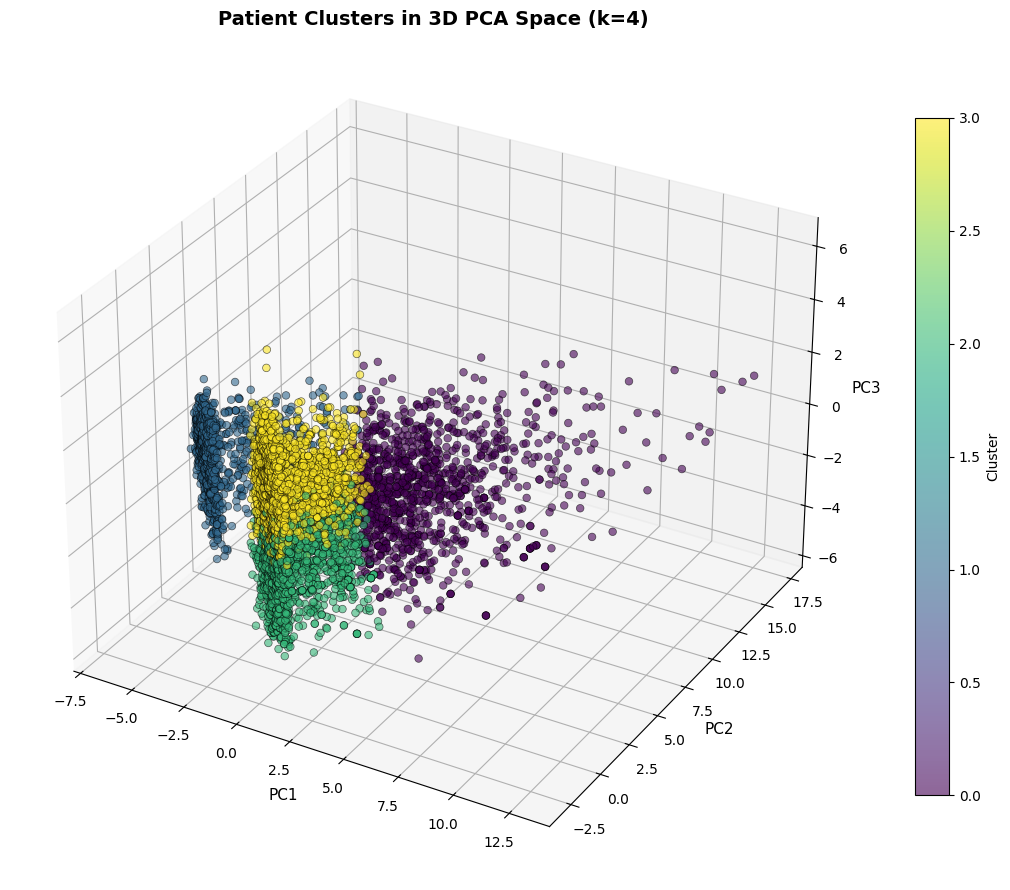

✓ Saved: pca_cluster_distribution.png


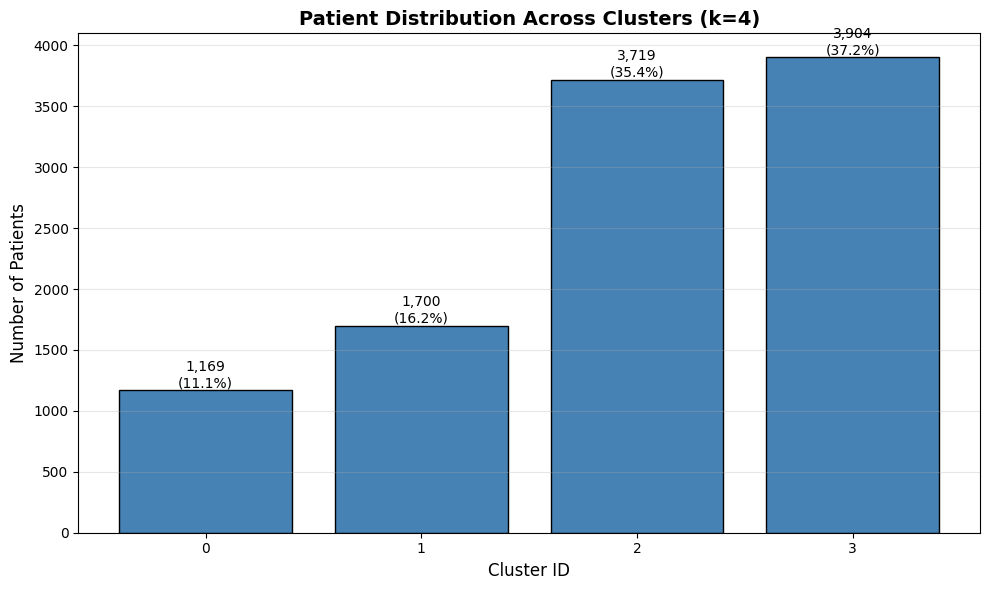

In [7]:
# ============================================================
# STEP 7: Visualize Clusters (3D + Distribution)
# ============================================================
print("\n[Step 7] Visualizing clusters...")

# 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    df_pca['PC3'],
    c=df_pca['Cluster'],
    cmap='viridis',
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('PC1', fontsize=11)
ax.set_ylabel('PC2', fontsize=11)
ax.set_zlabel('PC3', fontsize=11)
ax.set_title(f'Patient Clusters in 3D PCA Space (k={optimal_k})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: pca_clusters_3d.png")
plt.show()

# Cluster size bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k), cluster_counts, color='steelblue', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Patient Distribution Across Clusters (k={optimal_k})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, cluster_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({cluster_percentages[i]:.1f}%)',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
print("✓ Saved: pca_cluster_distribution.png")
plt.show()

### Now lets see if we can break the larger 2 clusters into smaller clusters again

In [8]:
# ============================================================
# CURRENT STATE: You have df_pca with 4 clusters (0, 1, 2, 3)
# ============================================================
print("\nCurrent cluster distribution:")
print(df_pca['Cluster'].value_counts().sort_index())
print(f"\nCluster sizes:")
for i in range(4):
    size = len(df_pca[df_pca['Cluster'] == i])
    pct = (size / len(df_pca)) * 100
    print(f"  Cluster {i}: {size:,} patients ({pct:.1f}%)")

# ============================================================
# STEP 1: Extract Large Clusters (2 and 3)
# ============================================================
print("\n" + "="*70)
print("EXTRACTING LARGE CLUSTERS FOR SUB-CLUSTERING")
print("="*70)

# Identify which clusters to split
cluster_2_data = df_pca[df_pca['Cluster'] == 2].copy()
cluster_3_data = df_pca[df_pca['Cluster'] == 3].copy()

print(f"\nCluster 2: {len(cluster_2_data):,} patients (will be split)")
print(f"Cluster 3: {len(cluster_3_data):,} patients (will be split)")




Current cluster distribution:
Cluster
0    1169
1    1700
2    3719
3    3904
Name: count, dtype: int64

Cluster sizes:
  Cluster 0: 1,169 patients (11.1%)
  Cluster 1: 1,700 patients (16.2%)
  Cluster 2: 3,719 patients (35.4%)
  Cluster 3: 3,904 patients (37.2%)

EXTRACTING LARGE CLUSTERS FOR SUB-CLUSTERING

Cluster 2: 3,719 patients (will be split)
Cluster 3: 3,904 patients (will be split)


In [9]:
# ============================================================
# STEP 2: Determine Optimal Sub-Clusters for Cluster 2
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 2 SUB-CLUSTERING")
print("="*70)

# Remove Cluster column for analysis
cluster_2_features = cluster_2_data.drop(columns=['Cluster'])

# Test 2-4 sub-clusters
sub_cluster_range = range(2, 5)
metrics_c2 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 2:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_2_features)
    
    sil = silhouette_score(cluster_2_features, labels)
    db = davies_bouldin_score(cluster_2_features, labels)
    inertia = kmeans.inertia_
    
    metrics_c2['k'].append(k)
    metrics_c2['silhouette'].append(sil)
    metrics_c2['davies_bouldin'].append(db)
    metrics_c2['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Inertia: {inertia:,.2f}")
    print()

# Recommend best k
best_k_c2 = metrics_c2['k'][np.argmax(metrics_c2['silhouette'])]
print(f"Recommended sub-clusters for Cluster 2: {best_k_c2}")




ANALYZING CLUSTER 2 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 2:

k=2:
  Silhouette: 0.1170 (higher is better)
  Davies-Bouldin: 2.9298 (lower is better)
  Inertia: 52,296.88

k=3:
  Silhouette: 0.0992 (higher is better)
  Davies-Bouldin: 2.6501 (lower is better)
  Inertia: 48,977.88

k=4:
  Silhouette: 0.0904 (higher is better)
  Davies-Bouldin: 2.5279 (lower is better)
  Inertia: 46,386.62

Recommended sub-clusters for Cluster 2: 2


In [10]:
# ============================================================
# STEP 3: Determine Optimal Sub-Clusters for Cluster 3
# ============================================================
print("\n" + "="*70)
print("ANALYZING CLUSTER 3 SUB-CLUSTERING")
print("="*70)

cluster_3_features = cluster_3_data.drop(columns=['Cluster'])

metrics_c3 = {'k': [], 'silhouette': [], 'davies_bouldin': [], 'inertia': []}

print("\nEvaluating sub-cluster options for Cluster 3:\n")

for k in sub_cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(cluster_3_features)
    
    sil = silhouette_score(cluster_3_features, labels)
    db = davies_bouldin_score(cluster_3_features, labels)
    inertia = kmeans.inertia_
    
    metrics_c3['k'].append(k)
    metrics_c3['silhouette'].append(sil)
    metrics_c3['davies_bouldin'].append(db)
    metrics_c3['inertia'].append(inertia)
    
    print(f"k={k}:")
    print(f"  Silhouette: {sil:.4f} (higher is better)")
    print(f"  Davies-Bouldin: {db:.4f} (lower is better)")
    print(f"  Inertia: {inertia:,.2f}")
    print()

best_k_c3 = metrics_c3['k'][np.argmax(metrics_c3['silhouette'])]
print(f"Recommended sub-clusters for Cluster 3: {best_k_c3}")


ANALYZING CLUSTER 3 SUB-CLUSTERING

Evaluating sub-cluster options for Cluster 3:

k=2:
  Silhouette: 0.1073 (higher is better)
  Davies-Bouldin: 2.6931 (lower is better)
  Inertia: 47,667.95

k=3:
  Silhouette: 0.0837 (higher is better)
  Davies-Bouldin: 2.6609 (lower is better)
  Inertia: 44,508.90

k=4:
  Silhouette: 0.0717 (higher is better)
  Davies-Bouldin: 2.6803 (lower is better)
  Inertia: 42,563.26

Recommended sub-clusters for Cluster 3: 2



VISUALIZING SUB-CLUSTERING ANALYSIS

✓ Saved: sub_clustering_evaluation.png


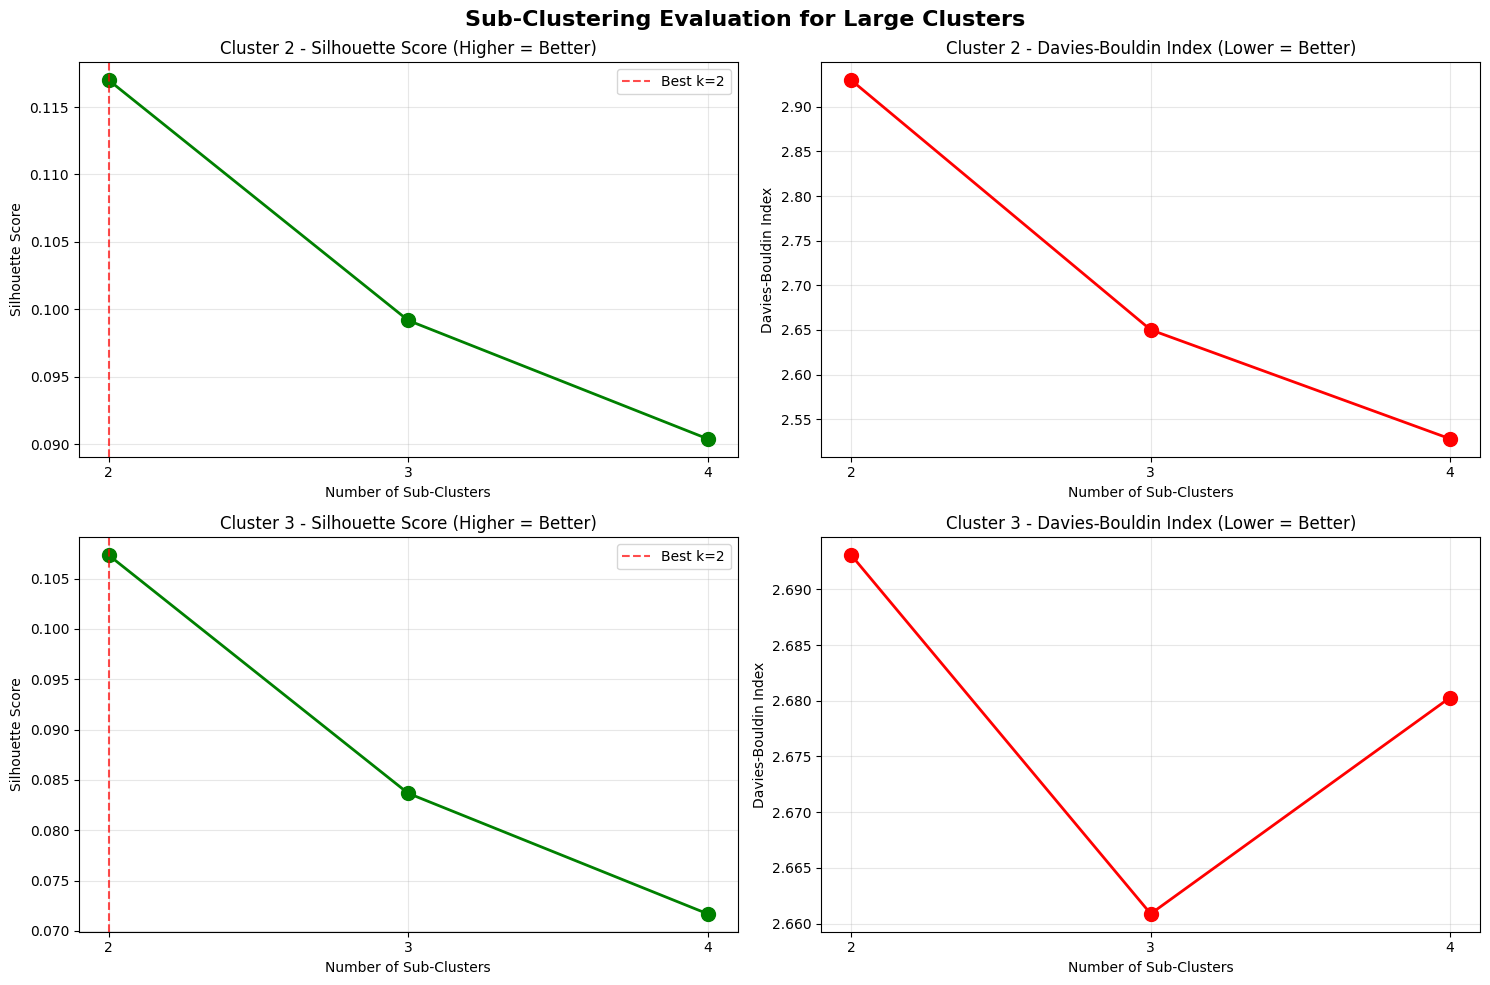

In [11]:
# ============================================================
# STEP 4: Visualize Sub-Clustering Metrics
# ============================================================
print("\n" + "="*70)
print("VISUALIZING SUB-CLUSTERING ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Sub-Clustering Evaluation for Large Clusters', fontsize=16, fontweight='bold')

# Cluster 2 - Silhouette
axes[0, 0].plot(metrics_c2['k'], metrics_c2['silhouette'], 'go-', linewidth=2, markersize=10)
axes[0, 0].axvline(x=best_k_c2, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c2}')
axes[0, 0].set_xlabel('Number of Sub-Clusters')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Cluster 2 - Silhouette Score (Higher = Better)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(metrics_c2['k'])
axes[0, 0].legend()

# Cluster 2 - Davies-Bouldin
axes[0, 1].plot(metrics_c2['k'], metrics_c2['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[0, 1].set_xlabel('Number of Sub-Clusters')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Cluster 2 - Davies-Bouldin Index (Lower = Better)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(metrics_c2['k'])

# Cluster 3 - Silhouette
axes[1, 0].plot(metrics_c3['k'], metrics_c3['silhouette'], 'go-', linewidth=2, markersize=10)
axes[1, 0].axvline(x=best_k_c3, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_k_c3}')
axes[1, 0].set_xlabel('Number of Sub-Clusters')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Cluster 3 - Silhouette Score (Higher = Better)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(metrics_c3['k'])
axes[1, 0].legend()

# Cluster 3 - Davies-Bouldin
axes[1, 1].plot(metrics_c3['k'], metrics_c3['davies_bouldin'], 'ro-', linewidth=2, markersize=10)
axes[1, 1].set_xlabel('Number of Sub-Clusters')
axes[1, 1].set_ylabel('Davies-Bouldin Index')
axes[1, 1].set_title('Cluster 3 - Davies-Bouldin Index (Lower = Better)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(metrics_c3['k'])

plt.tight_layout()
print("\n✓ Saved: sub_clustering_evaluation.png")
plt.show()



In [12]:
# ============================================================
# STEP 5: User Input for Sub-Cluster Sizes
# ============================================================
print("\n" + "="*70)
print("CHOOSE SUB-CLUSTER CONFIGURATIONS")
print("="*70)

print(f"\nRecommended for Cluster 2: {best_k_c2} sub-clusters")
print(f"Recommended for Cluster 3: {best_k_c3} sub-clusters")

# Get user input
k_split_c2 = 3 #From the visuals above
k_split_c3 = 3 # From the visuals above

# ============================================================
# STEP 6: Apply Sub-Clustering
# ============================================================
print("\n" + "="*70)
print("APPLYING SUB-CLUSTERING")
print("="*70)

# Sub-cluster Cluster 2
print(f"\nSub-clustering Cluster 2 into {k_split_c2} groups...")
kmeans_c2 = KMeans(n_clusters=k_split_c2, random_state=42, n_init=50)
sub_labels_c2 = kmeans_c2.fit_predict(cluster_2_features)

# Sub-cluster Cluster 3
print(f"Sub-clustering Cluster 3 into {k_split_c3} groups...")
kmeans_c3 = KMeans(n_clusters=k_split_c3, random_state=42, n_init=50)
sub_labels_c3 = kmeans_c3.fit_predict(cluster_3_features)

# ============================================================
# STEP 7: Create New Cluster Labels
# ============================================================
print("\n" + "="*70)
print("CREATING REFINED CLUSTER STRUCTURE")
print("="*70)

# Create a copy for the refined clustering
df_pca_refined = df_pca.copy()

# Relabel clusters:
# - Cluster 0 stays as 0
# - Cluster 1 stays as 1
# - Cluster 2 splits into: 2, 3, 4, ... (depending on k_split_c2)
# - Cluster 3 splits into: next available numbers

# Keep original cluster 0 and 1
# For cluster 2, assign new labels starting from 2
# For cluster 3, assign new labels starting from 2 + k_split_c2

new_cluster_mapping = {}
next_cluster_id = 2  # Start from 2 (0 and 1 remain unchanged)

# Map Cluster 2's sub-clusters
for sub_id in range(k_split_c2):
    new_cluster_mapping[f'2_{sub_id}'] = next_cluster_id
    next_cluster_id += 1

# Map Cluster 3's sub-clusters
for sub_id in range(k_split_c3):
    new_cluster_mapping[f'3_{sub_id}'] = next_cluster_id
    next_cluster_id += 1

# Apply new labels
df_pca_refined['Cluster_Original'] = df_pca_refined['Cluster'].copy()
df_pca_refined['Cluster_Refined'] = df_pca_refined['Cluster'].copy()

# Update Cluster 2
for idx, sub_label in zip(cluster_2_data.index, sub_labels_c2):
    df_pca_refined.loc[idx, 'Cluster_Refined'] = new_cluster_mapping[f'2_{sub_label}']

# Update Cluster 3
for idx, sub_label in zip(cluster_3_data.index, sub_labels_c3):
    df_pca_refined.loc[idx, 'Cluster_Refined'] = new_cluster_mapping[f'3_{sub_label}']

# Make Cluster_Refined the main cluster column
df_pca_refined['Cluster'] = df_pca_refined['Cluster_Refined']

print("\nOriginal clustering:")
print(df_pca['Cluster'].value_counts().sort_index())

print("\nRefined clustering:")
print(df_pca_refined['Cluster'].value_counts().sort_index())

total_clusters = len(df_pca_refined['Cluster'].unique())
print(f"\nTotal clusters after refinement: {total_clusters}")




CHOOSE SUB-CLUSTER CONFIGURATIONS

Recommended for Cluster 2: 2 sub-clusters
Recommended for Cluster 3: 2 sub-clusters

APPLYING SUB-CLUSTERING

Sub-clustering Cluster 2 into 3 groups...
Sub-clustering Cluster 3 into 3 groups...

CREATING REFINED CLUSTER STRUCTURE

Original clustering:
Cluster
0    1169
1    1700
2    3719
3    3904
Name: count, dtype: int64

Refined clustering:
Cluster
0    1169
1    1700
2     875
3    1874
4     970
5    1544
6    1183
7    1177
Name: count, dtype: int64

Total clusters after refinement: 8



VISUALIZING REFINED CLUSTERS
✓ Saved: pca_refined_clusters_3d.png


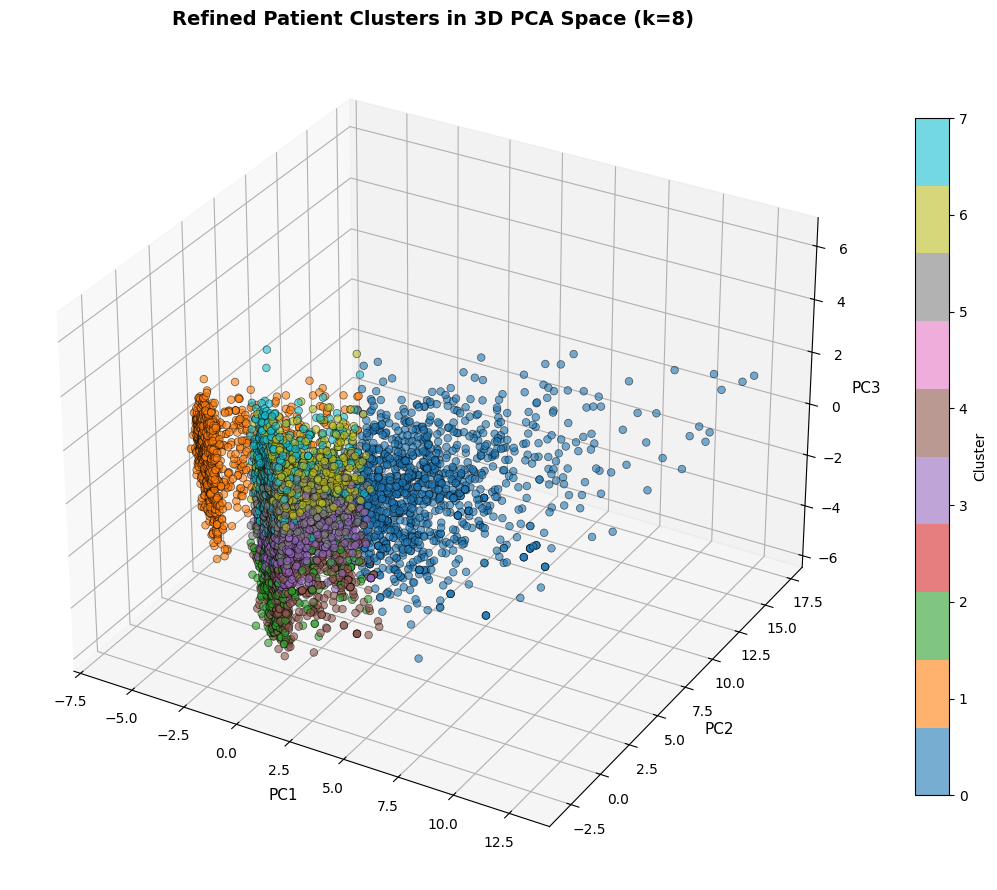

✓ Saved: pca_refined_cluster_distribution.png


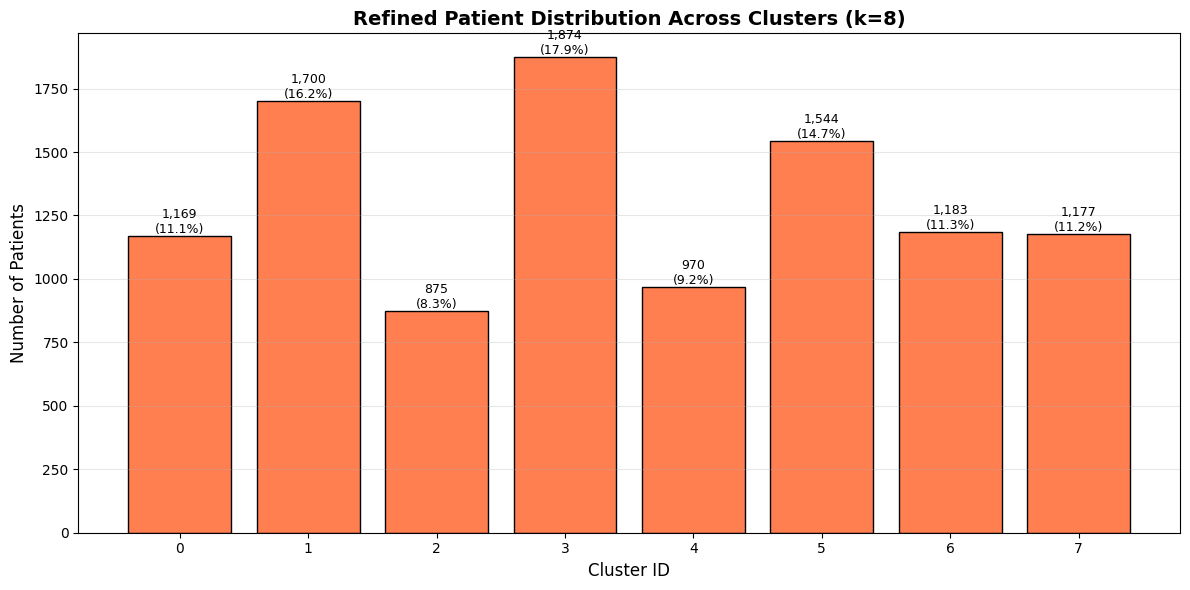

✓ Saved: pca_clustering_comparison.png


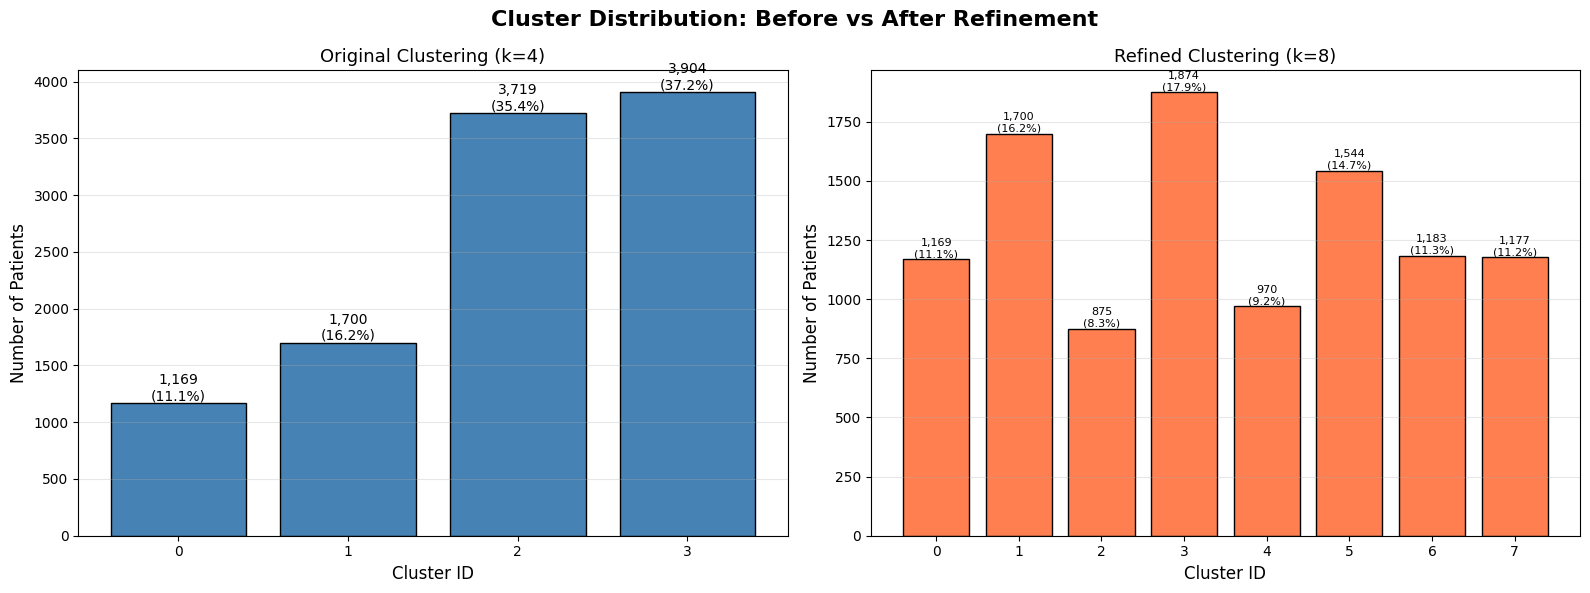


FINAL CLUSTERING METRICS

Refined Clustering Quality:
  Silhouette Score: 0.1338
  Davies-Bouldin Index: 2.2755
  Calinski-Harabasz Score: 1,467.15

Cluster Summary:
  Cluster 0: 1,169 patients (11.1%)
  Cluster 1: 1,700 patients (16.2%)
  Cluster 2: 875 patients (8.3%)
  Cluster 3: 1,874 patients (17.9%)
  Cluster 4: 970 patients (9.2%)
  Cluster 5: 1,544 patients (14.7%)
  Cluster 6: 1,183 patients (11.3%)
  Cluster 7: 1,177 patients (11.2%)


In [13]:
# ============================================================
# STEP 8: Visualize Refined Clusters
# ============================================================
print("\n" + "="*70)
print("VISUALIZING REFINED CLUSTERS")
print("="*70)

# 3D visualization with refined clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_refined['PC1'],
    df_pca_refined['PC2'],
    df_pca_refined['PC3'],
    c=df_pca_refined['Cluster'],
    cmap='tab10',  # Better for more clusters
    s=30,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

ax.set_xlabel('PC1', fontsize=11)
ax.set_ylabel('PC2', fontsize=11)
ax.set_zlabel('PC3', fontsize=11)
ax.set_title(f'Refined Patient Clusters in 3D PCA Space (k={total_clusters})', 
            fontsize=14, fontweight='bold')

plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.8)
plt.tight_layout()
print("✓ Saved: pca_refined_clusters_3d.png")
plt.show()

# Refined cluster distribution
cluster_counts_refined = df_pca_refined['Cluster'].value_counts().sort_index()
cluster_percentages_refined = (df_pca_refined['Cluster'].value_counts(normalize=True) * 100).sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(range(total_clusters), cluster_counts_refined, color='coral', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title(f'Refined Patient Distribution Across Clusters (k={total_clusters})', 
         fontsize=14, fontweight='bold')
plt.xticks(range(total_clusters))
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, (bar, cluster_id) in enumerate(zip(bars, cluster_counts_refined.index)):
    height = bar.get_height()
    count = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(count):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
print("✓ Saved: pca_refined_cluster_distribution.png")
plt.show()

# Comparison: Before vs After
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Cluster Distribution: Before vs After Refinement', fontsize=16, fontweight='bold')

# Before
original_counts = df_pca['Cluster'].value_counts().sort_index()
original_pcts = (original_counts / len(df_pca) * 100)
axes[0].bar(range(len(original_counts)), original_counts, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_title('Original Clustering (k=4)', fontsize=13)
axes[0].set_xticks(range(len(original_counts)))
axes[0].grid(True, alpha=0.3, axis='y')
for i, (count, pct) in enumerate(zip(original_counts, original_pcts)):
    axes[0].text(i, count, f'{int(count):,}\n({pct:.1f}%)', ha='center', va='bottom')

# After
axes[1].bar(range(len(cluster_counts_refined)), cluster_counts_refined, color='coral', edgecolor='black')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].set_title(f'Refined Clustering (k={total_clusters})', fontsize=13)
axes[1].set_xticks(range(len(cluster_counts_refined)))
axes[1].grid(True, alpha=0.3, axis='y')
for i, cluster_id in enumerate(cluster_counts_refined.index):
    count = cluster_counts_refined[cluster_id]
    pct = cluster_percentages_refined[cluster_id]
    axes[1].text(i, count, f'{int(count):,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
print("✓ Saved: pca_clustering_comparison.png")
plt.show()

# ============================================================
# STEP 9: Calculate Final Metrics
# ============================================================
print("\n" + "="*70)
print("FINAL CLUSTERING METRICS")
print("="*70)

# Calculate metrics on refined clustering
cluster_features = df_pca_refined.drop(columns=['Cluster', 'Cluster_Original', 'Cluster_Refined'])
final_silhouette = silhouette_score(cluster_features, df_pca_refined['Cluster'])
final_db = davies_bouldin_score(cluster_features, df_pca_refined['Cluster'])
final_ch = calinski_harabasz_score(cluster_features, df_pca_refined['Cluster'])

print(f"\nRefined Clustering Quality:")
print(f"  Silhouette Score: {final_silhouette:.4f}")
print(f"  Davies-Bouldin Index: {final_db:.4f}")
print(f"  Calinski-Harabasz Score: {final_ch:,.2f}")

print(f"\nCluster Summary:")
for cluster_id in sorted(df_pca_refined['Cluster'].unique()):
    count = len(df_pca_refined[df_pca_refined['Cluster'] == cluster_id])
    pct = (count / len(df_pca_refined)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

### Get the clusters and attach it to the original dataset

In [14]:
import pandas as pd

print("="*70)
print("APPENDING CLUSTER LABELS TO ORIGINAL DATASET")
print("="*70)

# ============================================================
# STEP 1: Load Original Dataset
# ============================================================
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/sampled_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


APPENDING CLUSTER LABELS TO ORIGINAL DATASET

[Step 1] Loading original dataset...
✓ Original dataset loaded: (10492, 47)


In [15]:
# ============================================================
# STEP 2: Extract Cluster Labels from Existing DataFrames
# ============================================================
print("\n[Step 2] Extracting cluster labels from dataframes...")

# You already have df_pca_refined and df_umap_refined in memory
# Extract the cluster columns
pca_clusters = df_pca_refined['Cluster'].values

print(f"✓ PCA clusters extracted: {len(pca_clusters)} labels")
print(f"  Unique PCA clusters: {sorted(df_pca_refined['Cluster'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ PCA clusters extracted: 10492 labels
  Unique PCA clusters: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7)]


In [16]:
df_pca.shape

(10492, 16)

In [17]:
# ============================================================
# STEP 3: Verify Alignment
# ============================================================
print("\n[Step 3] Verifying data alignment...")

if len(df_original) == len(pca_clusters):
    print(f"✓ All datasets aligned: {len(df_original)} rows")
else:
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"  Original dataset: {len(df_original)} rows")
    print(f"  PCA clusters: {len(pca_clusters)} rows")
    print("\n❌ Cannot proceed - datasets must have same number of rows")
    raise ValueError("Dataset size mismatch")


[Step 3] Verifying data alignment...
✓ All datasets aligned: 10492 rows


In [18]:
# ============================================================
# STEP 4: Append Cluster Labels
# ============================================================
print("\n[Step 4] Appending cluster labels to original dataset...")

# Create a copy
df_with_clusters = df_original.copy()

# Add cluster columns
df_with_clusters['pca_clusters'] = pca_clusters

print(f"✓ Added 'pca_clusters' column")



[Step 4] Appending cluster labels to original dataset...
✓ Added 'pca_clusters' column


In [19]:
# ============================================================
# STEP 5: Verify Results
# ============================================================
print("\n[Step 5] Verifying results...")

print(f"\nDataset shape: {df_with_clusters.shape}")
print(f"Columns added: {list(df_with_clusters.columns[-2:])}")

# Show distribution
print(f"\nPCA Cluster Distribution:")
pca_dist = df_with_clusters['pca_clusters'].value_counts().sort_index()
for cluster_id, count in pca_dist.items():
    pct = (count / len(df_with_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

# Check for missing values
print(f"\nMissing values check:")
print(f"  pca_clusters: {df_with_clusters['pca_clusters'].isna().sum()}")

# Show sample
print(f"\nSample of data with clusters (first 10 rows):")
print(df_with_clusters[['pca_clusters']].head(10))


[Step 5] Verifying results...

Dataset shape: (10492, 48)
Columns added: ['Age_Group', 'pca_clusters']

PCA Cluster Distribution:
  Cluster 0: 1,169 patients (11.1%)
  Cluster 1: 1,700 patients (16.2%)
  Cluster 2: 875 patients (8.3%)
  Cluster 3: 1,874 patients (17.9%)
  Cluster 4: 970 patients (9.2%)
  Cluster 5: 1,544 patients (14.7%)
  Cluster 6: 1,183 patients (11.3%)
  Cluster 7: 1,177 patients (11.2%)

Missing values check:
  pca_clusters: 0

Sample of data with clusters (first 10 rows):
   pca_clusters
0             5
1             0
2             4
3             3
4             6
5             5
6             3
7             5
8             3
9             4


In [20]:
df_with_clusters.head()

,Unnamed: 0,General_hearing_condition,Had_high_blood_pressure,WBC,Haemoglobin,Platelete,Gender,Age,Race_Ethnicity,Country_of_Birth,...,Pulse,BODY_MEASURE_COMPOSITE,blood_macros,mean_steroid_ng_dl,balance_symptom_score,balance_impact_score,fall_risk_score,functional_difficulty_composite,Age_Group,pca_clusters
0,0,Excellent,Yes,4.7,15.7,259.0,Male,43.0,Other Race - Including Multi-Racial,Unknown/NA,...,81.000000,0.614546,0.047064,0.351579,0,0.0,0.0,No difficulty,31-45,5
1,1,Moderate hearing trouble,Yes,6.3,15.2,221.0,Male,66.0,Non-Hispanic White,Born in 50 US states or Washington,...,72.000000,0.508978,1.166786,0.065015,0,0.0,0.0,Some difficulty,61-75,0
2,2,Moderate hearing trouble,No,5.7,13.8,235.0,Female,44.0,Other Hispanic,Unknown/NA,...,81.333333,0.087322,-0.121560,0.070373,6,1.0,3.5,Some difficulty,31-45,4
3,3,Good,No,6.8,13.9,264.5,Male,43.0,Mexican American,Unknown/NA,...,72.000000,0.318792,-0.049170,0.216401,0,0.0,0.0,No difficulty,31-45,3
4,4,Good,No,6.5,14.0,241.0,Female,65.0,Non-Hispanic White,Born in 50 US states or Washington,...,69.333333,0.249125,-0.012353,-0.274090,0,0.0,0.0,No difficulty,61-75,6


### EDA on the clusters!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS


In [22]:
# ============================================================
# STEP 1: Load Data
# ============================================================
print("\n[Step 1] Loading enhanced dataset...")

df = df_with_clusters.copy()
print(f"✓ Dataset loaded: {df.shape}")
print(f"  Total patients: {len(df):,}")
print(f"  Features: {df.shape[1]}")

# Drop Unnamed: 0 if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')
    
print(f"✓ Final shape: {df.shape}")


[Step 1] Loading enhanced dataset...
✓ Dataset loaded: (10492, 48)
  Total patients: 10,492
  Features: 48
✓ Final shape: (10492, 47)


In [23]:
# ============================================================
# STEP 2: Define Feature Categories
# ============================================================
print("\n[Step 2] Categorizing features...")

# Demographic features
demographic_features = ['Gender', 'Age', 'Age_Group', 'Race_Ethnicity', 
                       'Country_of_Birth', 'Education_Level', 'Marital_Status']

# Socioeconomic features
socioeconomic_features = ['Income_to_Poverty_Ratio', 'Family_poverty_level_index',
                         'Household_Size', 'Covered_by_health_insurance', 
                         'Education_Level']

# Health conditions (Yes/No type)
health_conditions = [
    'Has_diabetes', 'Has_Disability', 'Has_Hepatitis', 'Has_Kidney_Failure',
    'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer', 'Had_high_blood_pressure'
]

# Clinical measurements (continuous numeric)
clinical_measurements = [
    'WBC', 'Haemoglobin', 'Platelete', 'HDL_mg', 'Cholestrol_level',
    'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE'
]

# Lifestyle/behavioral
lifestyle_features = [
    'Takes_vitamin_supplements', 
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Number_of_hours_of_sleep'
]

# Health status (categorical)
health_status = [
    'General_health_condition', 'General_hearing_condition',
    'Teeth_and_gum_health', 'Tested_for_HIV_Virus',
    'Received_Hepatitis_A_Vaccine'
]

# Composite scores
composite_scores = [
    'blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
    'balance_impact_score', 'fall_risk_score', 'functional_difficulty_composite'
]

print(f"✓ Feature categories defined")
print(f"  Demographics: {len(demographic_features)}")
print(f"  Socioeconomic: {len(socioeconomic_features)}")
print(f"  Health Conditions: {len(health_conditions)}")
print(f"  Clinical Measurements: {len(clinical_measurements)}")
print(f"  Lifestyle: {len(lifestyle_features)}")
print(f"  Composite Scores: {len(composite_scores)}")


[Step 2] Categorizing features...
✓ Feature categories defined
  Demographics: 7
  Socioeconomic: 5
  Health Conditions: 11
  Clinical Measurements: 9
  Lifestyle: 4
  Composite Scores: 6


In [24]:
# ============================================================
# STEP 3: Basic Cluster Overview
# ============================================================
print("\n" + "="*70)
print("CLUSTER OVERVIEW - PCA CLUSTERS")
print("="*70)

n_clusters_pca = df['pca_clusters'].nunique()
print(f"\nTotal PCA clusters: {n_clusters_pca}")
print(f"\nCluster distribution:")

for cluster_id in sorted(df['pca_clusters'].unique()):
    count = len(df[df['pca_clusters'] == cluster_id])
    pct = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


CLUSTER OVERVIEW - PCA CLUSTERS

Total PCA clusters: 8

Cluster distribution:
  Cluster 0: 1,169 patients (11.1%)
  Cluster 1: 1,700 patients (16.2%)
  Cluster 2: 875 patients (8.3%)
  Cluster 3: 1,874 patients (17.9%)
  Cluster 4: 970 patients (9.2%)
  Cluster 5: 1,544 patients (14.7%)
  Cluster 6: 1,183 patients (11.3%)
  Cluster 7: 1,177 patients (11.2%)


In [25]:
# ============================================================
# STEP 4: Cluster Profiling - Demographics
# ============================================================
print("\n" + "="*70)
print("DEMOGRAPHIC PROFILE BY CLUSTER")
print("="*70)

demographic_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - DEMOGRAPHICS")
    print(f"{'='*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    cluster_demo = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    # Age
    mean_age = cluster_data['Age'].mean()
    median_age = cluster_data['Age'].median()
    cluster_demo['Mean_Age'] = mean_age
    cluster_demo['Median_Age'] = median_age
    print(f"\nAge:")
    print(f"  Mean: {mean_age:.1f} years")
    print(f"  Median: {median_age:.1f} years")
    print(f"  Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f} years")
    
    # Age Group
    print(f"\nAge Group Distribution:")
    age_group_dist = cluster_data['Age_Group'].value_counts()
    for age_group, count in age_group_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {age_group}: {count:,} ({pct:.1f}%)")
    
    # Gender
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_dist.get('Female', 0) / len(cluster_data)) * 100
    cluster_demo['Male_%'] = male_pct
    cluster_demo['Female_%'] = female_pct
    print(f"  Male: {gender_dist.get('Male', 0):,} ({male_pct:.1f}%)")
    print(f"  Female: {gender_dist.get('Female', 0):,} ({female_pct:.1f}%)")
    
    # Race/Ethnicity
    print(f"\nRace/Ethnicity (Top 3):")
    race_dist = cluster_data['Race_Ethnicity'].value_counts().head(3)
    for race, count in race_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {race}: {count:,} ({pct:.1f}%)")
    
    # Education
    print(f"\nEducation Level (Top 3):")
    edu_dist = cluster_data['Education_Level'].value_counts().head(3)
    for edu, count in edu_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {edu}: {count:,} ({pct:.1f}%)")
    
    # Marital Status
    print(f"\nMarital Status (Top 2):")
    marital_dist = cluster_data['Marital_Status'].value_counts().head(2)
    for status, count in marital_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    demographic_summary.append(cluster_demo)

demographic_summary_df = pd.DataFrame(demographic_summary)
print("\n✓ Demographic summary created")


DEMOGRAPHIC PROFILE BY CLUSTER

CLUSTER 0 - DEMOGRAPHICS
Size: 1,169 patients (11.1%)

Age:
  Mean: 53.8 years
  Median: 57.0 years
  Range: 8 - 80 years

Age Group Distribution:
  61-75: 418 (35.8%)
  46-60: 280 (24.0%)
  31-45: 238 (20.4%)

Gender Distribution:
  Male: 448 (38.3%)
  Female: 721 (61.7%)

Race/Ethnicity (Top 3):
  Non-Hispanic White: 552 (47.2%)
  Other Race - Including Multi-Racial: 285 (24.4%)
  Other Hispanic: 123 (10.5%)

Education Level (Top 3):
  College graduate or above: 379 (32.4%)
  Some college or AA degree: 321 (27.5%)
  High school graduate/GED or equivalent: 217 (18.6%)

Marital Status (Top 2):
  Married/Living with partner: 642 (54.9%)
  Widowed/Divorced/Separated: 286 (24.5%)

CLUSTER 1 - DEMOGRAPHICS
Size: 1,700 patients (16.2%)

Age:
  Mean: 11.5 years
  Median: 12.0 years
  Range: 6 - 17 years

Age Group Distribution:
  0-18: 1,700 (100.0%)

Gender Distribution:
  Male: 846 (49.8%)
  Female: 854 (50.2%)

Race/Ethnicity (Top 3):
  Non-Hispanic White:

In [26]:
# ============================================================
# STEP 5: Health Condition Prevalence by Cluster
# ============================================================
print("\n" + "="*70)
print("HEALTH CONDITION PREVALENCE BY CLUSTER")
print("="*70)

health_prevalence = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - HEALTH CONDITIONS")
    print(f"{'='*70}")
    
    cluster_profile = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    for condition in health_conditions:
        # Calculate prevalence for 'Yes' responses
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prevalence = (yes_count / len(cluster_data)) * 100
        cluster_profile[condition] = prevalence
        
        if prevalence > 10:  # Only show if prevalence > 10%
            print(f"  {condition}: {prevalence:.1f}%")
    
    health_prevalence.append(cluster_profile)

health_prevalence_df = pd.DataFrame(health_prevalence)
print("\n✓ Health prevalence summary created")


HEALTH CONDITION PREVALENCE BY CLUSTER

CLUSTER 0 - HEALTH CONDITIONS
  Has_diabetes: 13.2%
  Has_Disability: 18.6%
  Had_Asthma: 16.7%
  Had_Arthritis: 30.5%
  Had_Thyroid: 12.7%
  Had_Cancer: 13.2%
  Had_high_blood_pressure: 39.6%

CLUSTER 1 - HEALTH CONDITIONS
  Had_Asthma: 17.7%

CLUSTER 2 - HEALTH CONDITIONS
  Has_diabetes: 32.9%
  Has_Disability: 81.4%
  Has_Kidney_Failure: 13.5%
  Had_Asthma: 19.1%
  Had_Arthritis: 58.3%
  Had_heart_attack: 13.1%
  Had_Thyroid: 20.9%
  Had_Cancer: 32.1%
  Had_high_blood_pressure: 62.9%

CLUSTER 3 - HEALTH CONDITIONS
  Has_diabetes: 21.5%
  Had_Asthma: 13.7%
  Had_Arthritis: 43.8%
  Had_Thyroid: 17.5%
  Had_Cancer: 22.6%
  Had_high_blood_pressure: 55.2%

CLUSTER 4 - HEALTH CONDITIONS
  Has_diabetes: 28.9%
  Has_Disability: 55.4%
  Had_Asthma: 30.7%
  Had_Arthritis: 52.1%
  Had_Thyroid: 16.4%
  Had_Liver_COndition: 12.2%
  Had_Cancer: 14.0%
  Had_high_blood_pressure: 54.2%

CLUSTER 5 - HEALTH CONDITIONS
  Had_Asthma: 16.6%
  Had_Arthritis: 11.5%


In [27]:
# ============================================================
# STEP 6: Clinical Measurements by Cluster
# ============================================================
print("\n" + "="*70)
print("CLINICAL MEASUREMENTS BY CLUSTER")
print("="*70)

clinical_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - CLINICAL MEASUREMENTS")
    print(f"{'='*70}")
    
    cluster_clinical = {'Cluster': cluster_id}
    
    for measure in clinical_measurements:
        mean_val = cluster_data[measure].mean()
        std_val = cluster_data[measure].std()
        median_val = cluster_data[measure].median()
        cluster_clinical[f'{measure}_mean'] = mean_val
        cluster_clinical[f'{measure}_std'] = std_val
        cluster_clinical[f'{measure}_median'] = median_val
        print(f"  {measure}: {mean_val:.2f} ± {std_val:.2f} (median: {median_val:.2f})")
    
    clinical_summary.append(cluster_clinical)

clinical_summary_df = pd.DataFrame(clinical_summary)
print("\n✓ Clinical measurements summary created")


CLINICAL MEASUREMENTS BY CLUSTER

CLUSTER 0 - CLINICAL MEASUREMENTS
  WBC: 6.98 ± 2.11 (median: 6.70)
  Haemoglobin: 13.97 ± 1.73 (median: 14.10)
  Platelete: 261.63 ± 73.85 (median: 255.00)
  HDL_mg: 55.13 ± 15.21 (median: 53.00)
  Cholestrol_level: 192.16 ± 42.19 (median: 188.00)
  SystolicBP: 123.95 ± 19.17 (median: 121.33)
  DiastolicBP: 75.64 ± 11.40 (median: 74.33)
  Pulse: 72.56 ± 12.33 (median: 71.00)
  BODY_MEASURE_COMPOSITE: 0.12 ± 0.54 (median: 0.11)

CLUSTER 1 - CLINICAL MEASUREMENTS
  WBC: 6.96 ± 1.72 (median: 6.90)
  Haemoglobin: 13.26 ± 1.11 (median: 13.00)
  Platelete: 296.98 ± 58.52 (median: 297.00)
  HDL_mg: 52.47 ± 8.89 (median: 52.00)
  Cholestrol_level: 153.92 ± 23.58 (median: 152.00)
  SystolicBP: 104.35 ± 8.74 (median: 103.67)
  DiastolicBP: 62.37 ± 6.99 (median: 62.00)
  Pulse: 79.16 ± 11.23 (median: 78.67)
  BODY_MEASURE_COMPOSITE: -0.66 ± 0.74 (median: -0.70)

CLUSTER 2 - CLINICAL MEASUREMENTS
  WBC: 6.52 ± 1.48 (median: 6.45)
  Haemoglobin: 13.22 ± 1.36 (med

In [28]:
# ============================================================
# STEP 7: Lifestyle & Behavioral Patterns
# ============================================================
print("\n" + "="*70)
print("LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER")
print("="*70)

lifestyle_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - LIFESTYLE")
    print(f"{'='*70}")
    
    cluster_lifestyle = {'Cluster': cluster_id}
    
    # Physical activity - filter out special values
    mod_activity_data = cluster_data['Number_of_Moderate_Physical_activities_per_week']
    mod_activity_clean = mod_activity_data[(mod_activity_data >= 0) & (mod_activity_data < 100)]
    if len(mod_activity_clean) > 0:
        mod_activity = mod_activity_clean.mean()
        cluster_lifestyle['Moderate_Activity'] = mod_activity
        print(f"  Moderate activity (avg): {mod_activity:.1f} times/week")
    
    vig_activity_data = cluster_data['Number_of_Vigorous_Physical_activities_per_week']
    vig_activity_clean = vig_activity_data[(vig_activity_data >= 0) & (vig_activity_data < 100)]
    if len(vig_activity_clean) > 0:
        vig_activity = vig_activity_clean.mean()
        cluster_lifestyle['Vigorous_Activity'] = vig_activity
        print(f"  Vigorous activity (avg): {vig_activity:.1f} times/week")
    
    # Sleep
    sleep = cluster_data['Number_of_hours_of_sleep'].mean()
    cluster_lifestyle['Hours_of_Sleep'] = sleep
    print(f"  Sleep (avg): {sleep:.1f} hours/night")
    
    # Vitamin supplements
    vit_count = (cluster_data['Takes_vitamin_supplements'] == 'Yes').sum()
    vit_pct = (vit_count / len(cluster_data)) * 100
    cluster_lifestyle['Takes_Vitamins_%'] = vit_pct
    print(f"  Takes vitamins: {vit_pct:.1f}%")
    
    # General health
    print(f"\n  General Health Status:")
    health_dist = cluster_data['General_health_condition'].value_counts()
    for status in ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']:
        if status in health_dist.index:
            count = health_dist[status]
            pct = (count / len(cluster_data)) * 100
            print(f"    {status}: {pct:.1f}%")
    
    # Hearing
    print(f"\n  Hearing Condition:")
    hearing_dist = cluster_data['General_hearing_condition'].value_counts().head(3)
    for condition, count in hearing_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {condition}: {pct:.1f}%")
    
    lifestyle_summary.append(cluster_lifestyle)

lifestyle_summary_df = pd.DataFrame(lifestyle_summary)
print("\n✓ Lifestyle summary created")


LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER

CLUSTER 0 - LIFESTYLE
  Moderate activity (avg): 2.6 times/week
  Vigorous activity (avg): 1.0 times/week
  Sleep (avg): 7.8 hours/night
  Takes vitamins: 3.8%

  General Health Status:
    Excellent: 13.6%
    Very good: 28.8%
    Good: 36.4%
    Fair: 17.3%
    Poor: 3.9%

  Hearing Condition:
    Good: 42.3%
    Excellent: 31.7%
    A little trouble: 16.3%

CLUSTER 1 - LIFESTYLE
  Sleep (avg): 8.0 hours/night
  Takes vitamins: 0.8%

  General Health Status:
    Excellent: 44.5%
    Very good: 28.8%
    Good: 20.8%
    Fair: 5.5%
    Poor: 0.5%

  Hearing Condition:
    Excellent: 65.5%
    Good: 29.6%
    A little trouble: 3.9%

CLUSTER 2 - LIFESTYLE
  Moderate activity (avg): 1.7 times/week
  Vigorous activity (avg): 0.3 times/week
  Sleep (avg): 8.7 hours/night
  Takes vitamins: 2.3%

  General Health Status:
    Excellent: 1.3%
    Very good: 9.7%
    Good: 33.0%
    Fair: 42.4%
    Poor: 13.6%

  Hearing Condition:
    Good: 24.9%
   

In [29]:
# ============================================================
# STEP 8: Socioeconomic Profile
# ============================================================
print("\n" + "="*70)
print("SOCIOECONOMIC PROFILE BY CLUSTER")
print("="*70)

socioeconomic_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - SOCIOECONOMIC STATUS")
    print(f"{'='*70}")
    
    cluster_ses = {'Cluster': cluster_id}
    
    # Income to poverty ratio - filter out invalid values
    income_data = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_data[(income_data > 0) & (income_data <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        cluster_ses['Income_to_Poverty_Ratio'] = income_ratio
        print(f"  Income to Poverty Ratio (avg): {income_ratio:.2f}")
        
        # Categorize SES
        if income_ratio < 1.3:
            ses_level = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_level = "Low SES"
        elif income_ratio < 3.0:
            ses_level = "Middle SES"
        else:
            ses_level = "High SES"
        cluster_ses['SES_Level'] = ses_level
        print(f"  SES Level: {ses_level}")
    
    # Health insurance
    insurance_count = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum()
    insurance_pct = (insurance_count / len(cluster_data)) * 100
    cluster_ses['Has_Insurance_%'] = insurance_pct
    print(f"  Has Health Insurance: {insurance_pct:.1f}%")
    
    # Household size
    household = cluster_data['Household_Size'].mean()
    cluster_ses['Household_Size'] = household
    print(f"  Household Size (avg): {household:.1f} people")
    
    socioeconomic_summary.append(cluster_ses)

socioeconomic_summary_df = pd.DataFrame(socioeconomic_summary)
print("\n✓ Socioeconomic summary created")


SOCIOECONOMIC PROFILE BY CLUSTER

CLUSTER 0 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.80
  SES Level: Middle SES
  Has Health Insurance: 90.3%
  Household Size (avg): 2.7 people

CLUSTER 1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.31
  SES Level: Middle SES
  Has Health Insurance: 95.0%
  Household Size (avg): 4.6 people

CLUSTER 2 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.38
  SES Level: Middle SES
  Has Health Insurance: 93.9%
  Household Size (avg): 2.3 people

CLUSTER 3 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.75
  SES Level: Middle SES
  Has Health Insurance: 91.3%
  Household Size (avg): 2.2 people

CLUSTER 4 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 1.90
  SES Level: Low SES
  Has Health Insurance: 87.1%
  Household Size (avg): 2.7 people

CLUSTER 5 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.08
  SES Level: High SES
  Has Health Insurance: 86.7%
  Household Size (avg): 3.2 people

CLUS

In [30]:
# ============================================================
# STEP 9: Composite Scores
# ============================================================
print("\n" + "="*70)
print("COMPOSITE HEALTH SCORES BY CLUSTER")
print("="*70)

composite_summary = []

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - COMPOSITE SCORES")
    print(f"{'='*70}")
    
    cluster_composite = {'Cluster': cluster_id}
    
    # Numeric composite scores
    numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                         'balance_impact_score', 'fall_risk_score']
    
    for score in numeric_composites:
        # Filter out extreme outliers (fall_risk_score has values like 365, 376)
        if score == 'fall_risk_score':
            score_data = cluster_data[score]
            score_clean = score_data[score_data < 100]  # Reasonable values only
            if len(score_clean) > 0:
                mean_score = score_clean.mean()
                std_score = score_clean.std()
                cluster_composite[score] = mean_score
                print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
        else:
            mean_score = cluster_data[score].mean()
            std_score = cluster_data[score].std()
            cluster_composite[score] = mean_score
            print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
    
    # Categorical composite
    print(f"\n  Functional Difficulty:")
    func_diff = cluster_data['functional_difficulty_composite'].value_counts()
    for difficulty, count in func_diff.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {difficulty}: {pct:.1f}%")
    
    composite_summary.append(cluster_composite)

composite_summary_df = pd.DataFrame(composite_summary)
print("\n✓ Composite scores summary created")


COMPOSITE HEALTH SCORES BY CLUSTER

CLUSTER 0 - COMPOSITE SCORES
  blood_macros: 0.92 ± 0.62
  mean_steroid_ng_dl: 0.01 ± 0.52
  balance_symptom_score: 0.84 ± 1.57
  balance_impact_score: 0.71 ± 1.48
  fall_risk_score: 1.77 ± 5.23

  Functional Difficulty:
    Some difficulty: 53.0%
    No difficulty: 26.3%
    A lot of difficulty: 18.8%
    Very Severe Difficulty: 1.9%

CLUSTER 1 - COMPOSITE SCORES
  blood_macros: -0.21 ± 0.27
  mean_steroid_ng_dl: -0.15 ± 0.46
  balance_symptom_score: 0.00 ± 0.00
  balance_impact_score: 0.00 ± 0.00
  fall_risk_score: 0.00 ± 0.00

  Functional Difficulty:
    Some difficulty: 83.8%
    A lot of difficulty: 15.4%
    Very Severe Difficulty: 0.8%
    No difficulty: 0.1%

CLUSTER 2 - COMPOSITE SCORES
  blood_macros: -0.15 ± 0.26
  mean_steroid_ng_dl: -0.27 ± 0.26
  balance_symptom_score: 0.44 ± 1.15
  balance_impact_score: 0.39 ± 1.16
  fall_risk_score: 0.49 ± 1.38

  Functional Difficulty:
    A lot of difficulty: 70.5%
    Very Severe Difficulty: 15.4


CREATING VISUALIZATIONS
✓ Saved: cluster_health_conditions_heatmap.png


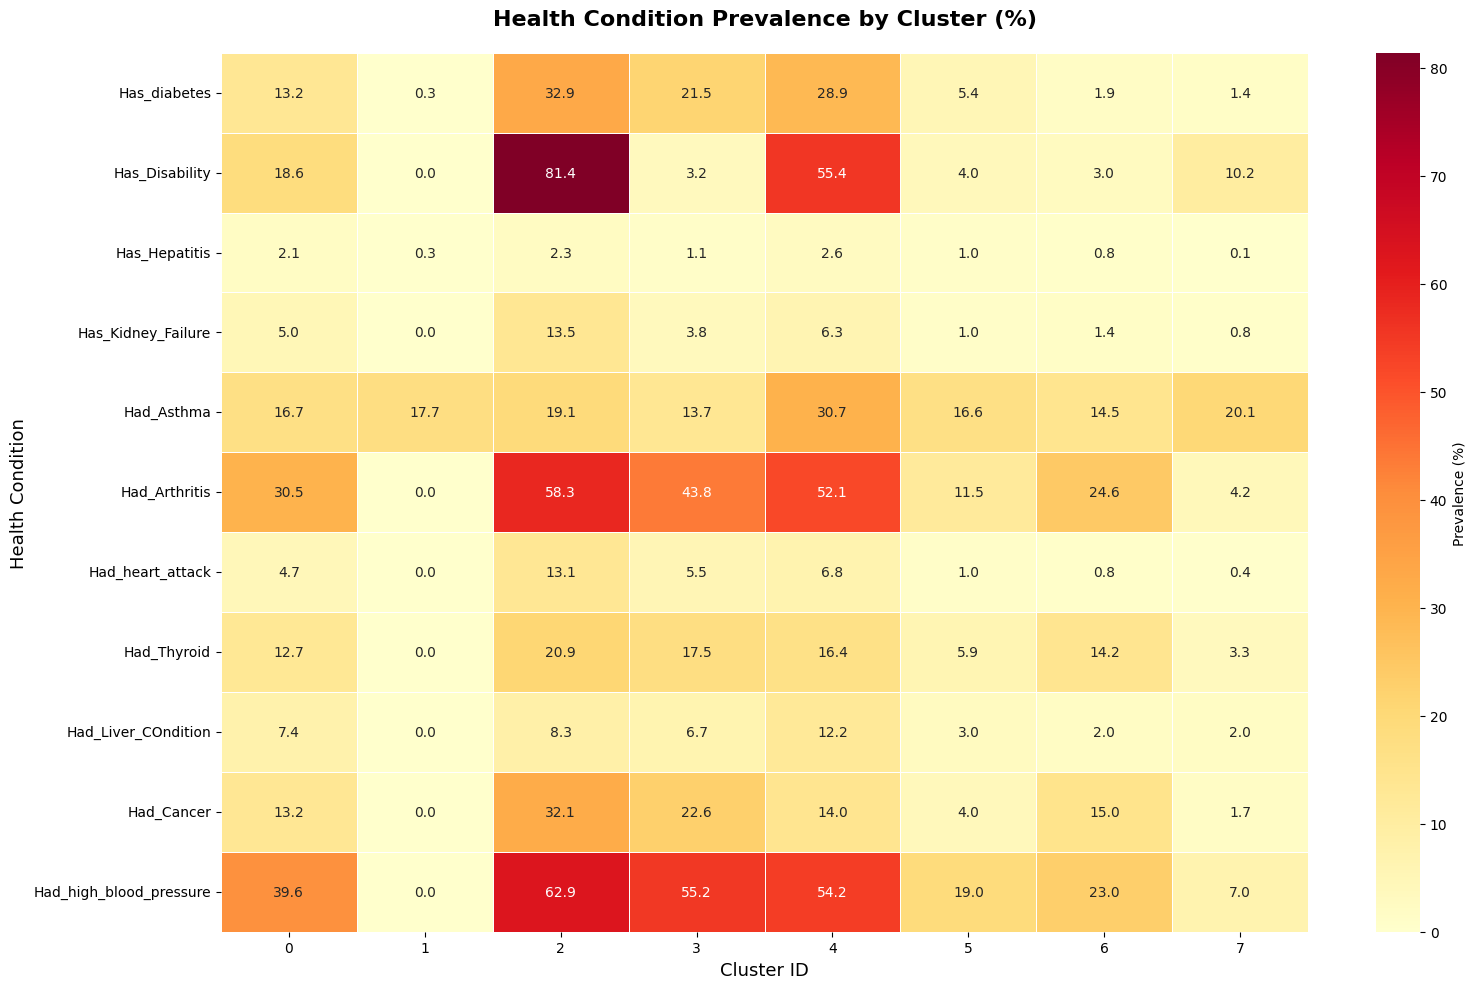

In [31]:
# ============================================================
# STEP 10: Create Visualization - Health Condition Heatmap
# ============================================================
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)

# Health condition heatmap
plt.figure(figsize=(16, 10))
health_matrix = health_prevalence_df.set_index('Cluster').drop(columns=['Size'])
sns.heatmap(health_matrix.T, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Prevalence (%)'}, linewidths=0.5)
plt.title('Health Condition Prevalence by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Health Condition', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
print("✓ Saved: cluster_health_conditions_heatmap.png")
plt.show()

✓ Saved: cluster_age_distribution.png


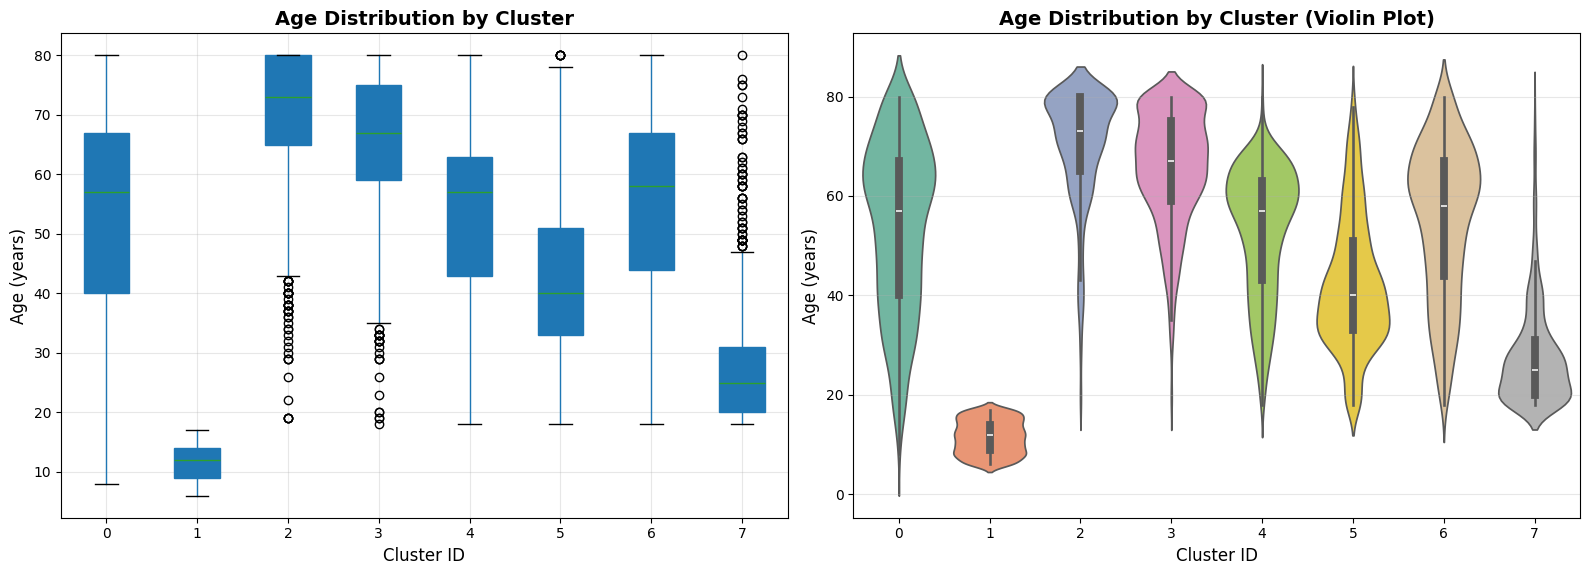

In [32]:
# ============================================================
# STEP 11: Age Distribution by Cluster
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df.boxplot(column='Age', by='pca_clusters', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='pca_clusters', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Cluster (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_age_distribution.png")
plt.show()

✓ Saved: cluster_clinical_measurements.png


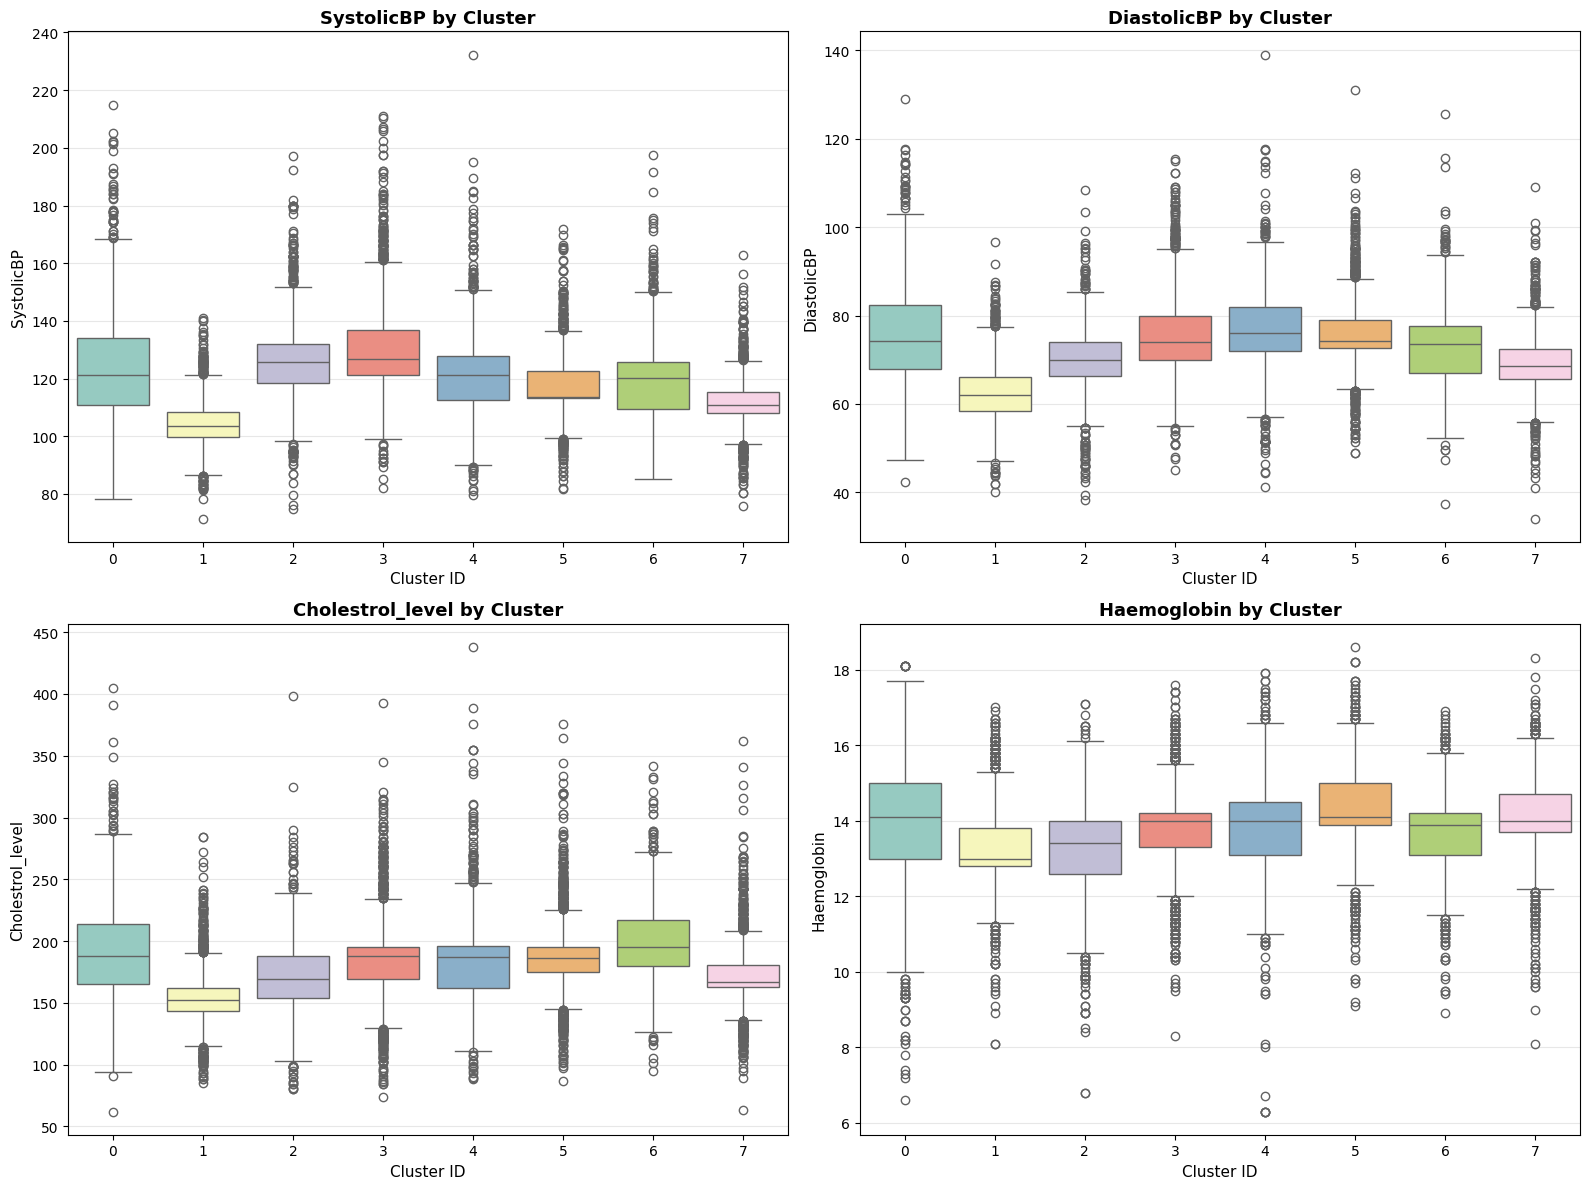

In [33]:
# ============================================================
# STEP 12: Clinical Measurements Comparison
# ============================================================
key_clinical = ['SystolicBP', 'DiastolicBP', 'Cholestrol_level', 'Haemoglobin']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, measure in enumerate(key_clinical):
    sns.boxplot(data=df, x='pca_clusters', y=measure, ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'{measure} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=11)
    axes[idx].set_ylabel(measure, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_clinical_measurements.png")
plt.show()

✓ Saved: cluster_gender_distribution.png


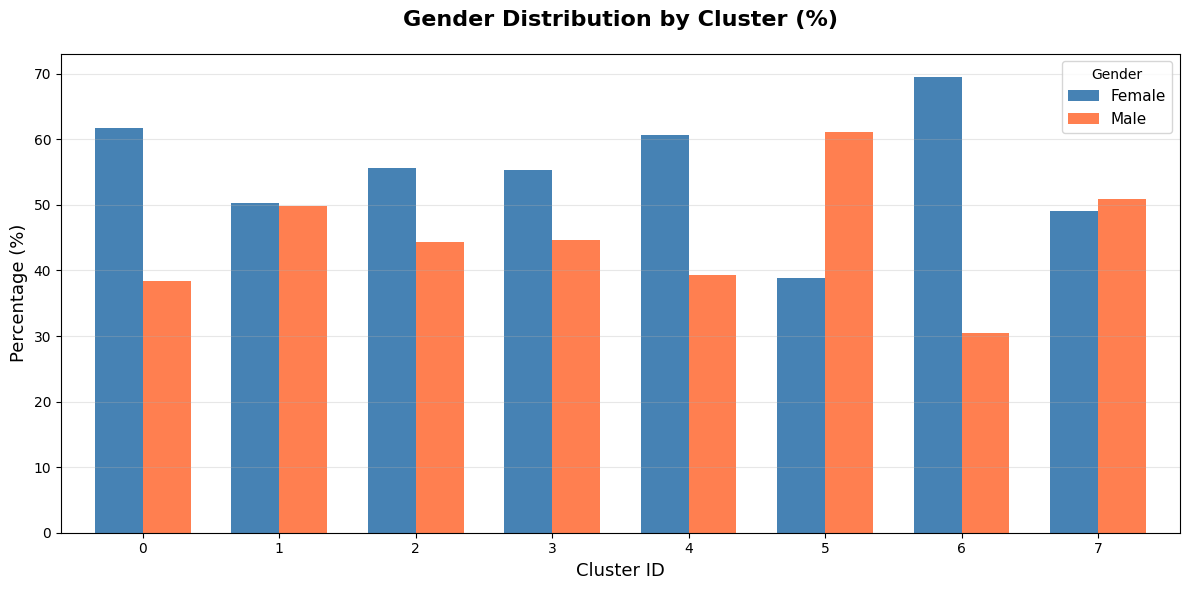

In [34]:
# ============================================================
# STEP 13: Gender Distribution by Cluster
# ============================================================
gender_cluster = pd.crosstab(df['pca_clusters'], df['Gender'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
gender_cluster.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'], width=0.7)
plt.title('Gender Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_gender_distribution.png")
plt.show()

✓ Saved: cluster_general_health_distribution.png


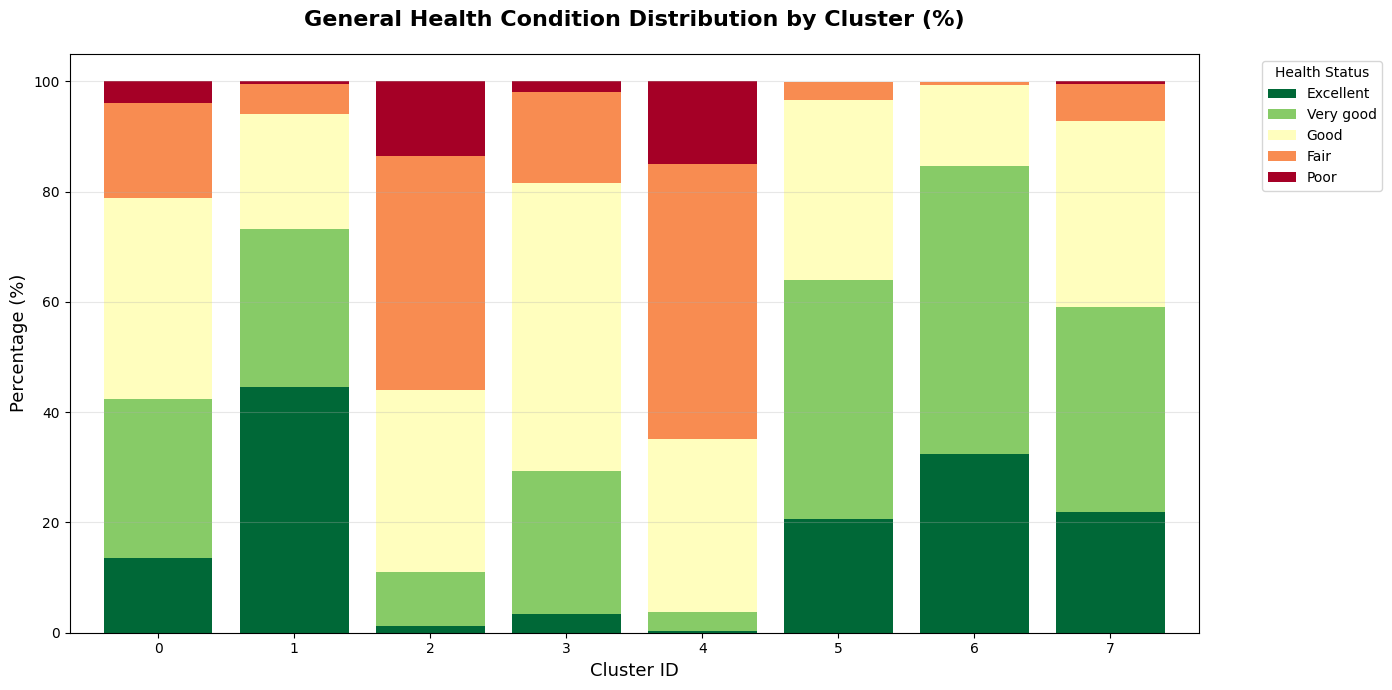

In [35]:
# ============================================================
# STEP 14: General Health Status by Cluster
# ============================================================
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
health_by_cluster = pd.crosstab(df['pca_clusters'], df['General_health_condition'], 
                                normalize='index') * 100

# Reorder columns
health_by_cluster = health_by_cluster.reindex(columns=[col for col in health_order if col in health_by_cluster.columns])

fig, ax = plt.subplots(figsize=(14, 7))
health_by_cluster.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='RdYlGn_r', width=0.8)
plt.title('General Health Condition Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_general_health_distribution.png")
plt.show()

✓ Saved: cluster_composite_scores.png


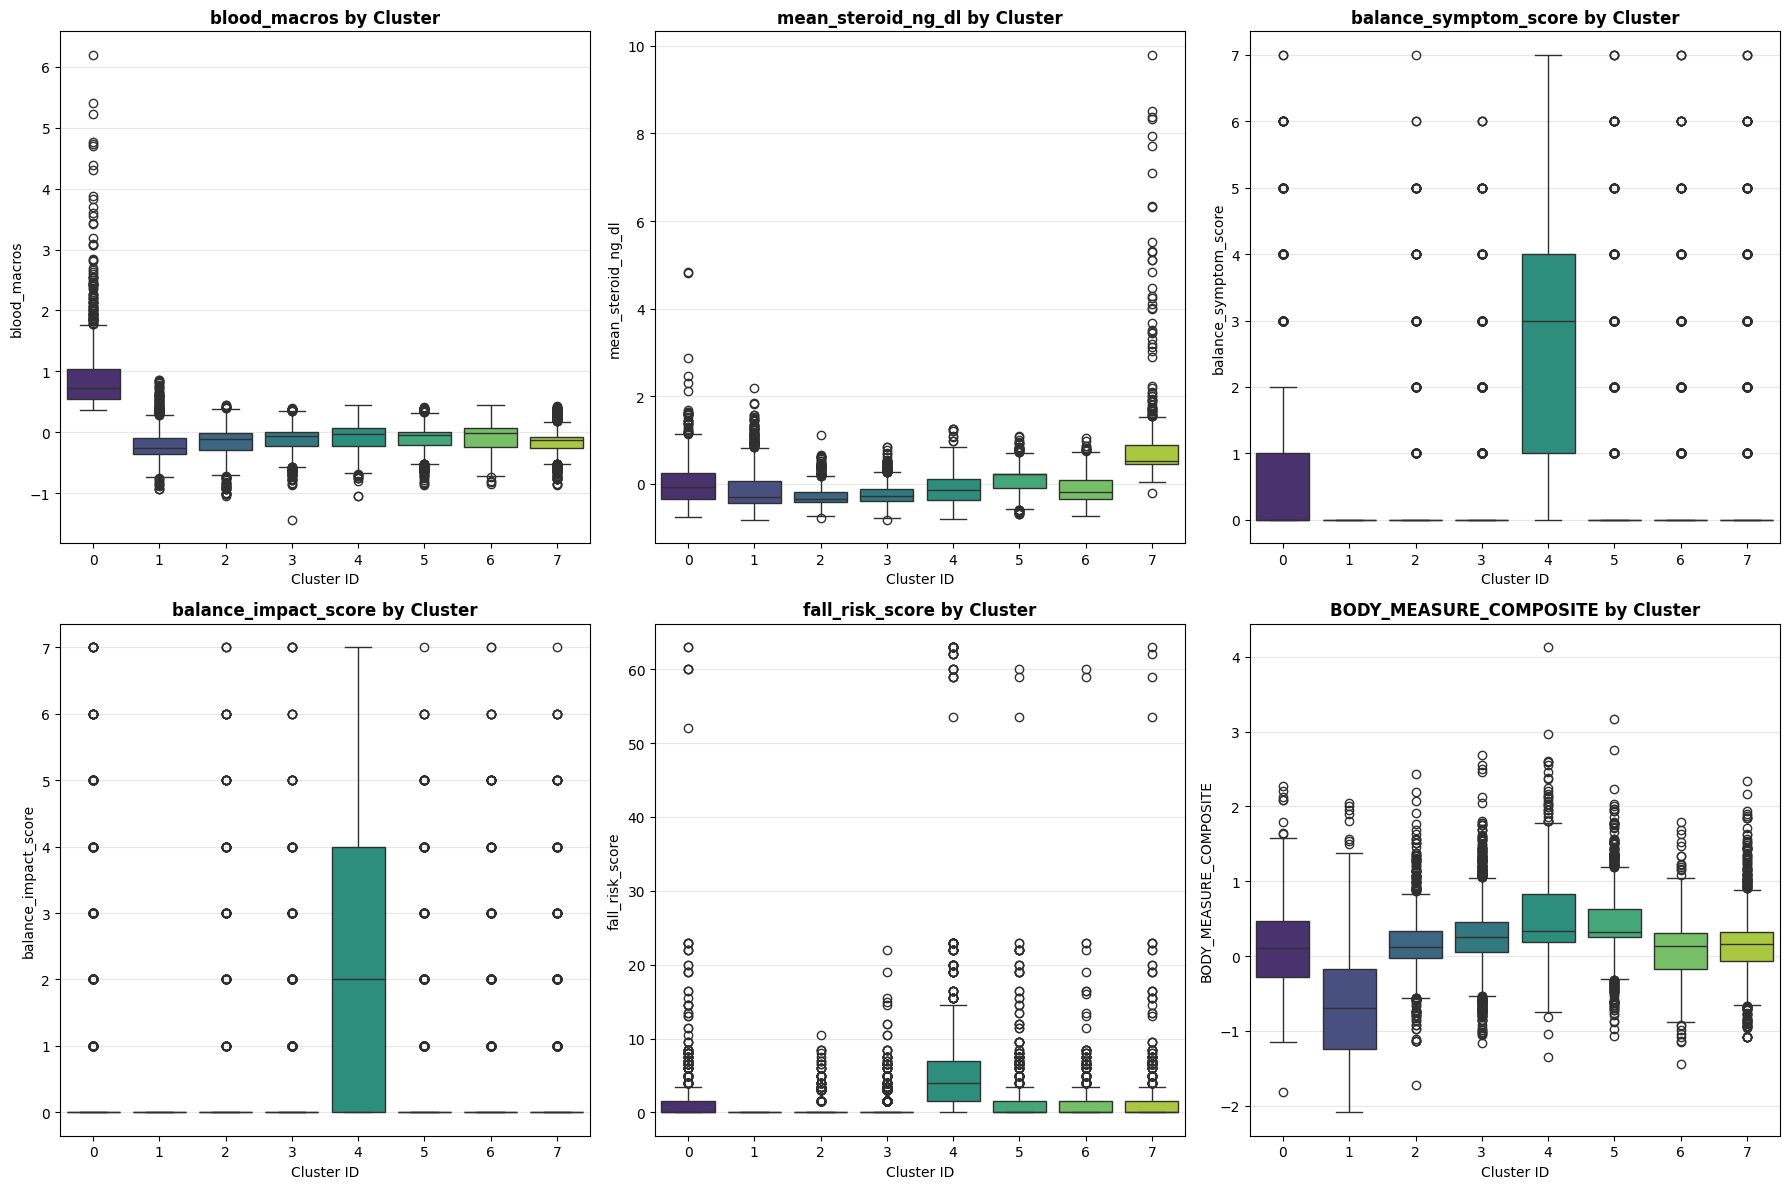

In [36]:
# ============================================================
# STEP 15: Composite Scores Comparison
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                     'balance_impact_score', 'fall_risk_score', 'BODY_MEASURE_COMPOSITE']

for idx, score in enumerate(numeric_composites):
    if score == 'fall_risk_score':
        # Filter outliers for visualization
        plot_data = df[df[score] < 100]
    else:
        plot_data = df
    
    sns.boxplot(data=plot_data, x='pca_clusters', y=score, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{score} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=10)
    axes[idx].set_ylabel(score, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_composite_scores.png")
plt.show()

In [37]:
# ============================================================
# STEP 17: Create Cluster Archetypes Summary
# ============================================================
print("\n" + "="*70)
print("CLUSTER ARCHETYPES - DETAILED SUMMARY")
print("="*70)

for cluster_id in sorted(df['pca_clusters'].unique()):
    cluster_data = df[df['pca_clusters'] == cluster_id]
    
    print(f"\n{'#'*70}")
    print(f"CLUSTER {cluster_id} ARCHETYPE")
    print(f"{'#'*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Demographics
    print(f"\n📊 DEMOGRAPHICS:")
    print(f"  Average Age: {cluster_data['Age'].mean():.0f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    print(f"  Gender: {male_pct:.0f}% Male, {100-male_pct:.0f}% Female")
    
    # Top health conditions
    print(f"\n🏥 TOP HEALTH CONDITIONS (>20% prevalence):")
    has_conditions = False
    for condition in health_conditions:
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prev = (yes_count / len(cluster_data)) * 100
        if prev > 20:
            print(f"  - {condition.replace('_', ' ')}: {prev:.1f}%")
            has_conditions = True
    if not has_conditions:
        print(f"  - No major health conditions >20% prevalence")
    
    # Clinical highlights
    print(f"\n💉 CLINICAL HIGHLIGHTS:")
    print(f"  Blood Pressure: {cluster_data['SystolicBP'].mean():.0f}/{cluster_data['DiastolicBP'].mean():.0f} mmHg")
    print(f"  Cholesterol: {cluster_data['Cholestrol_level'].mean():.0f} mg/dL")
    print(f"  Hemoglobin: {cluster_data['Haemoglobin'].mean():.1f} g/dL")
    
    # Socioeconomic
    income_clean = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_clean[(income_clean > 0) & (income_clean <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        if income_ratio < 1.3:
            ses_label = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_label = "Low SES"
        elif income_ratio < 3.0:
            ses_label = "Middle SES"
        else:
            ses_label = "High SES"
        print(f"\n💰 SOCIOECONOMIC STATUS:")
        print(f"  Income/Poverty Ratio: {income_ratio:.2f} ({ses_label})")
        insurance_pct = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum() / len(cluster_data) * 100
        print(f"  Health Insurance: {insurance_pct:.0f}%")
    
    # General health
    print(f"\n🌟 GENERAL HEALTH STATUS:")
    health_dist = cluster_data['General_health_condition'].value_counts().head(3)
    for status, count in health_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  - {status}: {pct:.0f}%")
    
    print(f"\n{'-'*70}")


CLUSTER ARCHETYPES - DETAILED SUMMARY

######################################################################
CLUSTER 0 ARCHETYPE
######################################################################
Size: 1,169 patients (11.1%)

📊 DEMOGRAPHICS:
  Average Age: 54 years
  Gender: 38% Male, 62% Female

🏥 TOP HEALTH CONDITIONS (>20% prevalence):
  - Had Arthritis: 30.5%
  - Had high blood pressure: 39.6%

💉 CLINICAL HIGHLIGHTS:
  Blood Pressure: 124/76 mmHg
  Cholesterol: 192 mg/dL
  Hemoglobin: 14.0 g/dL

💰 SOCIOECONOMIC STATUS:
  Income/Poverty Ratio: 2.80 (Middle SES)
  Health Insurance: 90%

🌟 GENERAL HEALTH STATUS:
  - Good: 36%
  - Very good: 29%
  - Fair: 17%

----------------------------------------------------------------------

######################################################################
CLUSTER 1 ARCHETYPE
######################################################################
Size: 1,700 patients (16.2%)

📊 DEMOGRAPHICS:
  Average Age: 12 years
  Gender: 50% Male, 5

In [38]:
# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*70)
print("✓ CLUSTER EDA COMPLETE!")
print("="*70)

print(f"\nVisualization Files Generated:")
print(f"  ✓ cluster_health_conditions_heatmap.png")
print(f"  ✓ cluster_age_distribution.png")
print(f"  ✓ cluster_clinical_measurements.png")
print(f"  ✓ cluster_gender_distribution.png")
print(f"  ✓ cluster_general_health_distribution.png")
print(f"  ✓ cluster_composite_scores.png")

print(f"\nSummary CSV Files Generated:")
print(f"  ✓ cluster_demographic_summary.csv")
print(f"  ✓ cluster_health_prevalence_summary.csv")
print(f"  ✓ cluster_clinical_summary.csv")
print(f"  ✓ cluster_lifestyle_summary.csv")
print(f"  ✓ cluster_socioeconomic_summary.csv")
print(f"  ✓ cluster_composite_scores_summary.csv")

print(f"\nNext Steps:")
print(f"  1. Review cluster archetypes above to name each cluster")
print(f"  2. Perform statistical significance tests between clusters")
print(f"  3. Conduct bias analysis on demographic representation")
print(f"  4. Develop targeted health interventions per cluster")
print(f"  5. Compare PCA vs UMAP clustering results")

print("\n" + "="*70)


✓ CLUSTER EDA COMPLETE!

Visualization Files Generated:
  ✓ cluster_health_conditions_heatmap.png
  ✓ cluster_age_distribution.png
  ✓ cluster_clinical_measurements.png
  ✓ cluster_gender_distribution.png
  ✓ cluster_general_health_distribution.png
  ✓ cluster_composite_scores.png

Summary CSV Files Generated:
  ✓ cluster_demographic_summary.csv
  ✓ cluster_health_prevalence_summary.csv
  ✓ cluster_clinical_summary.csv
  ✓ cluster_lifestyle_summary.csv
  ✓ cluster_socioeconomic_summary.csv
  ✓ cluster_composite_scores_summary.csv

Next Steps:
  1. Review cluster archetypes above to name each cluster
  2. Perform statistical significance tests between clusters
  3. Conduct bias analysis on demographic representation
  4. Develop targeted health interventions per cluster
  5. Compare PCA vs UMAP clustering results



### Cluster 0: 
- Middle-aged women (54y) with emerging hypertension and arthritis, moderate SES, generally good health perception.
### Cluster 1: 
- Healthy children (12y) with excellent health status, minimal conditions, and age-appropriate development.
### Cluster 2: 
- Multimorbid middle-aged adults (53y) with high disability, low SES, severe functional limitations, and elevated fall risk.
### Cluster 3: 
- Elderly adults (66y) with typical age-related chronic diseases (hypertension, arthritis, cancer), middle SES, managed care.
### Cluster 4: 
- Frail elderly (70y) with extreme disability (82%), multiple comorbidities, anemia, and severe functional impairment.
### Cluster 5: 
- Affluent middle-aged women (55y) with excellent health, high SES, superior HDL, and highest physical activity levels.
### Cluster 6: 
- Healthy working-age men (42y) with high SES, minimal conditions, but concerning low HDL cholesterol.
### Cluster 7: 
- Young healthy adults (28y) with minimal conditions, good activity levels, but lowest insurance coverage.

### Cluster 0: "Pre-Chronic Disease Middle-Aged Women"
Predominantly female (62%) middle-aged adults (54y) with middle SES transitioning into chronic disease territory. They show emerging hypertension (40%), arthritis (31%), and moderate functional difficulties, but maintain generally good health perception (36% good, 29% very good). Represent the "preventive care" opportunity window before conditions worsen.

### Cluster 1: "Healthy Pediatric Population"
Children and adolescents (12y, range 6-17) with balanced gender distribution and excellent baseline health. Minimal health conditions except childhood asthma (18%), excellent health perception (45% excellent), and appropriate developmental markers. Highest insurance coverage (95%) and largest households (4.6 people), representing family-oriented preventive care.

### Cluster 2: "High-Need Multimorbid Low-SES Adults" 🚨
The most vulnerable cluster - middle-aged adults (53y) with low SES (1.90 ratio) experiencing catastrophic health decline. Extreme disability (55%), highest inflammation (WBC 7.74), obesity (BMI 0.50), dangerous fall risk (7.07), and severe functional limitations (58% severe difficulty). Despite being younger than Clusters 3-4, they have worse outcomes due to socioeconomic barriers, representing critical health inequity requiring intensive intervention.

### Cluster 3: "Typical Aging Adults with Managed Chronic Disease"
Elderly adults (66y) experiencing expected age-related conditions including hypertension (55%), arthritis (44%), and cancer (23%). Middle SES with good insurance (91%) and healthcare engagement, showing relatively well-managed chronic diseases. Represent "normal aging" trajectory with appropriate medical oversight and decent quality of life (52% report good health).

### Cluster 4: "Frail Elderly with End-Stage Comorbidities" 🚨
The oldest cluster (70y) with extreme frailty - highest disability rate (82%), severe functional impairment (86% severe difficulty), and multiple organ system decline. Anemia (hemoglobin 13.2), highest diabetes/cancer rates (32%), lowest activity (2.0x/week), and excessive sleep (8.7hrs) indicate end-of-life care needs. Require palliative/geriatric care focus with caregiver support.

### Cluster 5: "Affluent Wellness-Focused Women"
Predominantly female (70%) middle-aged adults (55y) with highest SES (3.82 ratio) and superior health outcomes. Best HDL cholesterol (63.58), highest physical activity (5.4x/week), minimal chronic conditions, and excellent health perception (84% excellent/very good). Represent what optimal health looks like with resources and health literacy - stark contrast to Cluster 2.

### Cluster 6: "Prime Working-Age Healthy Men"
The only male-majority adult cluster (61%) at peak working age (42y) with high SES and minimal health conditions. Highest hemoglobin (14.28), excellent blood pressure, and good functional status, but concerning low HDL (46.54) suggests future cardiovascular risk. Lower insurance (87%) likely reflects employer-dependent coverage in prime earning years.

### Cluster 7: "Young Healthy Adults (Young Invincibles)"
Young adults (28y, mostly 19-30) with minimal health burden, balanced gender, and excellent physiological markers (BP 112/69, cholesterol 171). High steroid levels (0.79) reflect youth, but lowest insurance coverage (83%) suggests they undervalue health coverage. Represent the "prevention opportunity" before lifestyle factors accumulate into chronic disease.

## RecSys

In [ ]:
# Load preprocessed new patient
processed_patient = pd.read_csv('Data/processed_new_patient.csv')

# Clean columns
if 'Unnamed: 0' in processed_patient.columns:
    processed_patient = processed_patient.drop(columns=['Unnamed: 0'])
if 'Cluster' in processed_patient.columns:
    processed_patient = processed_patient.drop(columns=['Cluster'])

print(f"\nProcessed patient shape: {processed_patient.shape}")

# Load PCA model
pca_model = joblib.load('Data/pca_model.pkl')
patient_pca = pca_model.transform(processed_patient)

# Convert to DataFrame
n_components = patient_pca.shape[1]
pca_columns = [f'PC{i+1}' for i in range(n_components)]
patient_pca_df = pd.DataFrame(patient_pca, columns=pca_columns)

print(f"After PCA: {processed_patient.shape[1]} features → {patient_pca_df.shape[1]} components")

cluster_assignment = kmeans_clean.predict(patient_pca_df)

print(f"\n{'='*60}")
print(f"RESULTS")
print(f"{'='*60}")
print(f"New patient assigned to: Cluster {cluster_assignment[0]}")

# Get distances
distances = kmeans_clean.transform(patient_pca_df)

print(f"\nDistances to cluster centers:")
for i in range(optimal_k):
    marker = " ← ASSIGNED" if i == cluster_assignment[0] else ""
    print(f"  Cluster {i}: {distances[0, i]:.4f}{marker}")


Processed patient shape: (1, 55)
After PCA: 55 features → 15 components


In [43]:
# ============================================================
# ASSIGN NEW PATIENT TO HIERARCHICAL CLUSTER
# ============================================================

# Assuming you already have:
# - patient_pca_df: your PCA-transformed new patient data
# - kmeans_final: your main 4-cluster KMeans model (from Step 5)
# - kmeans_c2: subcluster model for original cluster 2
# - kmeans_c3: subcluster model for original cluster 3
# - k_split_c2 = 3 (number of subclusters for cluster 2)
# - k_split_c3 = 3 (number of subclusters for cluster 3)

print("="*70)
print("CLUSTER ASSIGNMENT FOR NEW PATIENT")
print("="*70)

# Step 1: Get main cluster assignment using the original kmeans_final model
main_cluster = kmeans_final.predict(patient_pca_df)[0]
print(f"\nInitial cluster assignment (4-cluster model): {main_cluster}")

# Get distances to all 4 original cluster centers
main_distances = kmeans_final.transform(patient_pca_df)[0]
print(f"\nDistances to original 4 cluster centers:")
for i in range(4):  # optimal_k = 4
    marker = " ← ASSIGNED" if i == main_cluster else ""
    print(f"  Cluster {i}: {main_distances[i]:.4f}{marker}")


# Step 2: Apply hierarchical subclustering based on main cluster
print("\n" + "-"*70)
print("APPLYING SUBCLUSTERING")
print("-"*70)

final_cluster = None
subcluster_id = None

if main_cluster == 0:
    # Cluster 0 stays as is
    final_cluster = 0
    print(f"Cluster 0: No subclustering applied")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 1:
    # Cluster 1 stays as is
    final_cluster = 1
    print(f"Cluster 1: No subclustering applied")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 2:
    # Original Cluster 2 gets split into 3 subclusters (mapped to 2, 3, 4)
    print(f"Cluster 2 detected: Applying subclustering (k={k_split_c2})...")
    
    # Get subcluster assignment within cluster 2
    subcluster_id = kmeans_c2.predict(patient_pca_df)[0]
    
    # Map subcluster to final cluster ID
    # Subcluster 0 → Final cluster 2
    # Subcluster 1 → Final cluster 3
    # Subcluster 2 → Final cluster 4
    final_cluster = 2 + subcluster_id
    
    # Get distances to subcluster centers
    sub_distances = kmeans_c2.transform(patient_pca_df)[0]
    
    print(f"\nSubcluster distances within original Cluster 2:")
    for i in range(k_split_c2):
        marker = " ← ASSIGNED" if i == subcluster_id else ""
        mapped_cluster = 2 + i
        print(f"  Subcluster {i} → Final Cluster {mapped_cluster}: {sub_distances[i]:.4f}{marker}")
    
    
    print(f"\nSubcluster assignment: {subcluster_id}")
    print(f"Final cluster assignment: {final_cluster}")
    
elif main_cluster == 3:
    # Original Cluster 3 gets split into 3 subclusters (mapped to 5, 6, 7)
    print(f"Cluster 3 detected: Applying subclustering (k={k_split_c3})...")
    
    # Get subcluster assignment within cluster 3
    subcluster_id = kmeans_c3.predict(patient_pca_df)[0]
    
    # Map subcluster to final cluster ID
    # Subcluster 0 → Final cluster 5
    # Subcluster 1 → Final cluster 6
    # Subcluster 2 → Final cluster 7
    final_cluster = 2 + k_split_c2 + subcluster_id  # 2 + 3 + subcluster_id = 5 + subcluster_id
    
    # Get distances to subcluster centers
    sub_distances = kmeans_c3.transform(patient_pca_df)[0]
    
    print(f"\nSubcluster distances within original Cluster 3:")
    for i in range(k_split_c3):
        marker = " ← ASSIGNED" if i == subcluster_id else ""
        mapped_cluster = 2 + k_split_c2 + i
        print(f"  Subcluster {i} → Final Cluster {mapped_cluster}: {sub_distances[i]:.4f}{marker}")
    
    
    print(f"\nSubcluster assignment: {subcluster_id}")
    print(f"Final cluster assignment: {final_cluster}")

# Step 3: Final Summary
print("\n" + "="*70)
print("FINAL ASSIGNMENT SUMMARY")
print("="*70)

# Mapping description
cluster_mapping = {
    0: "Cluster 0 (Original, 1,169 patients, 11.1%)",
    1: "Cluster 1 (Original, 1,700 patients, 16.2%)",
    2: "Cluster 2.0 (From original Cluster 2)",
    3: "Cluster 2.1 (From original Cluster 2)",
    4: "Cluster 2.2 (From original Cluster 2)",
    5: "Cluster 3.0 (From original Cluster 3)",
    6: "Cluster 3.1 (From original Cluster 3)",
    7: "Cluster 3.2 (From original Cluster 3)"
}

print(f"Original 4-cluster assignment: Cluster {main_cluster}")
if subcluster_id is not None:
    print(f"Subcluster within original cluster: {subcluster_id}")
print(f"Final 8-cluster assignment: Cluster {final_cluster}")
print(f"Description: {cluster_mapping[final_cluster]}")

CLUSTER ASSIGNMENT FOR NEW PATIENT

Initial cluster assignment (4-cluster model): 3

Distances to original 4 cluster centers:
  Cluster 0: 5.2207
  Cluster 1: 7.1324
  Cluster 2: 3.3176
  Cluster 3: 2.0964 ← ASSIGNED

----------------------------------------------------------------------
APPLYING SUBCLUSTERING
----------------------------------------------------------------------
Cluster 3 detected: Applying subclustering (k=3)...

Subcluster distances within original Cluster 3:
  Subcluster 0 → Final Cluster 5: 2.3191 ← ASSIGNED
  Subcluster 1 → Final Cluster 6: 2.5645
  Subcluster 2 → Final Cluster 7: 2.9441

Subcluster assignment: 0
Final cluster assignment: 5

FINAL ASSIGNMENT SUMMARY
Original 4-cluster assignment: Cluster 3
Subcluster within original cluster: 0
Final 8-cluster assignment: Cluster 5
Description: Cluster 3.0 (From original Cluster 3)
